<a href="https://colab.research.google.com/github/A-jcodes/CUSTOMER_CHURN_PREDICTION/blob/main/CUSTOMER_CHURN_PREDICTION_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
# data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings ("ignore")

In [ ]:
#imported data frame
df=pd.read_csv("/content/Customer-Churn.csv")
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [ ]:
#detecting missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

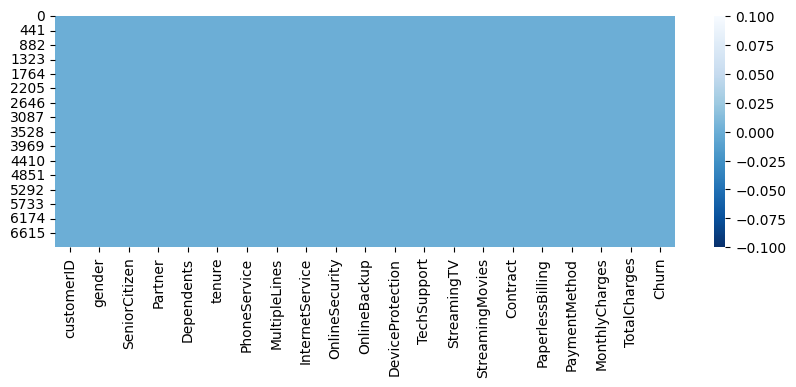

In [ ]:
#visualize to make sure
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(),cbar=True,cmap='Blues_r');

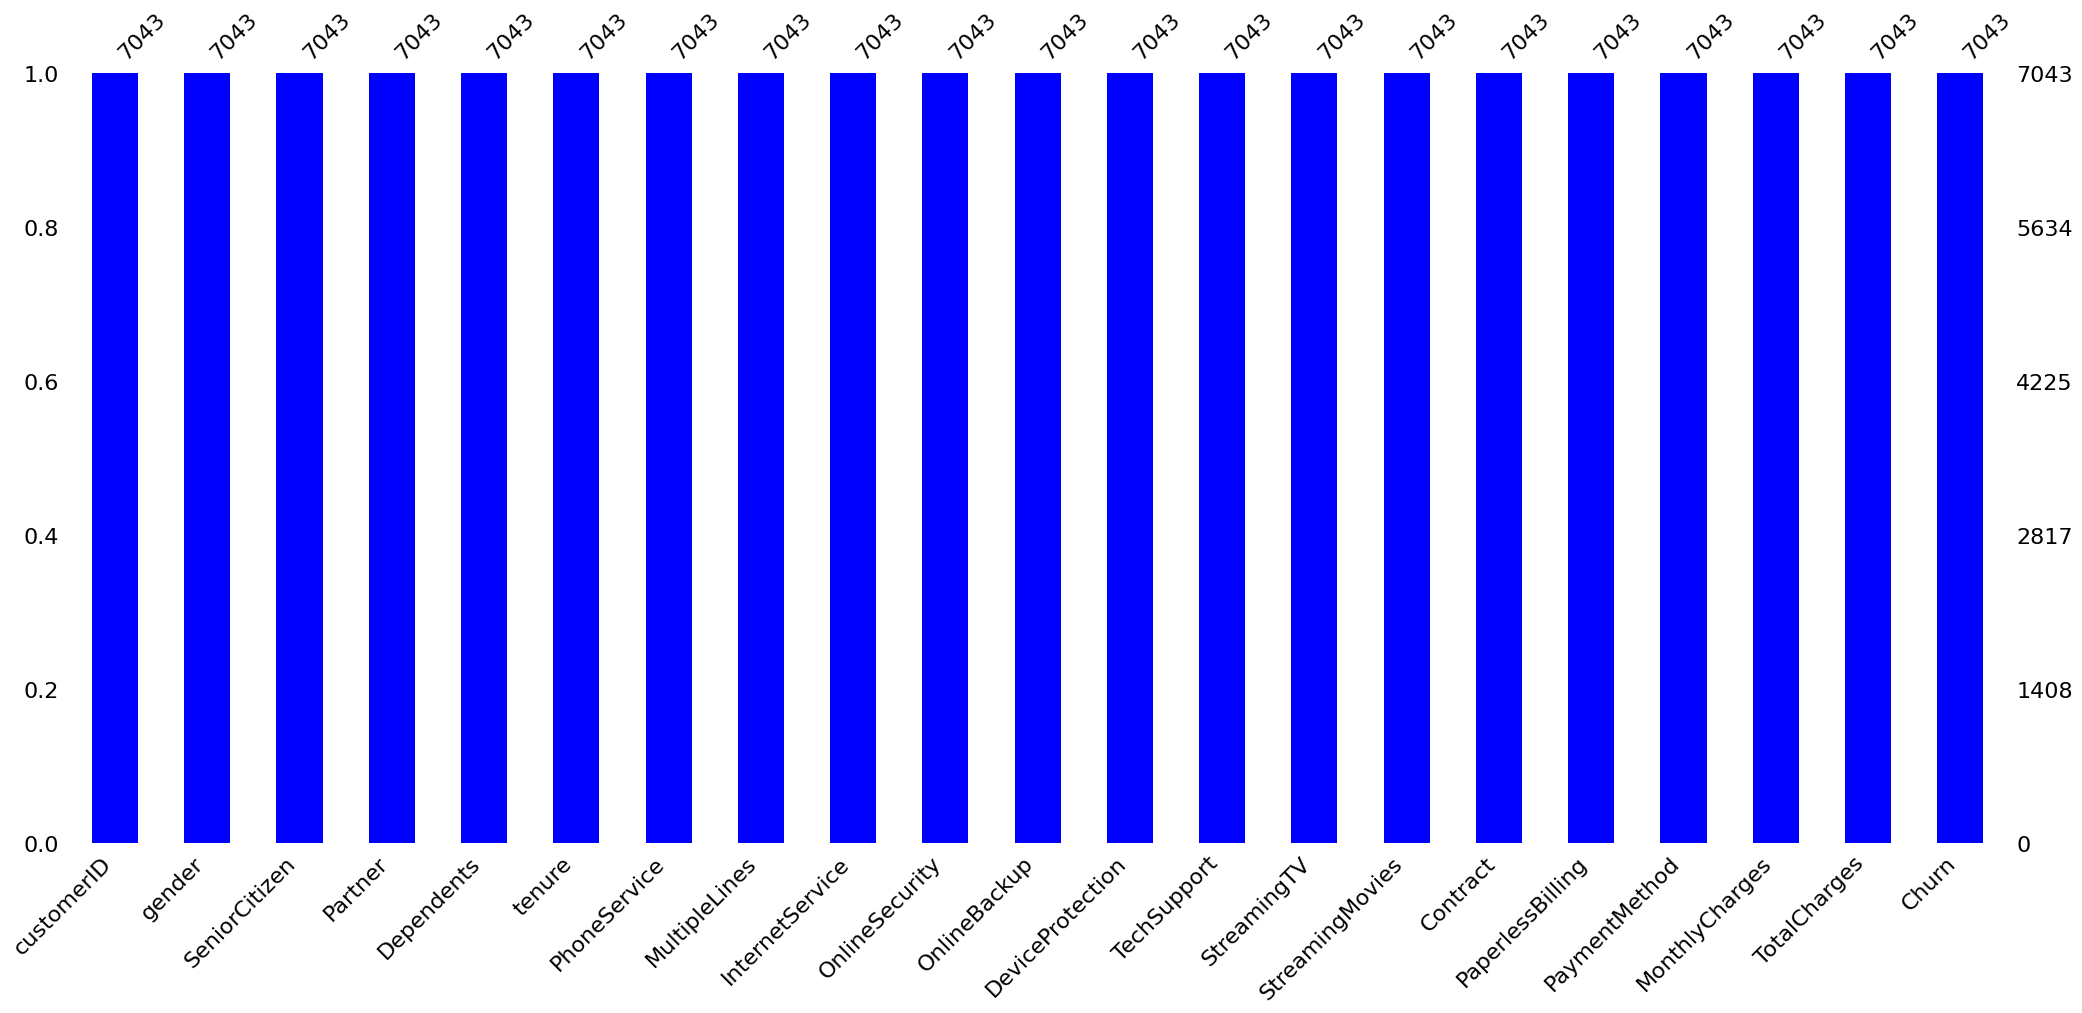

In [ ]:
msno.bar(df,color='b');

In [ ]:
#no missing values detected
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [ ]:
#check for outliers
wc = [col for col in df.columns if (df[col].dtype != 'object')]
wc
#df.T

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [ ]:
df.T

0             1               2     \
customerID              7590-VHVEG    5575-GNVDE      3668-QPYBK   
gender                      Female          Male            Male   
SeniorCitizen                    0             0               0   
Partner                        Yes            No              No   
Dependents                      No            No              No   
tenure                           1            34               2   
PhoneService                    No           Yes             Yes   
MultipleLines     No phone service            No              No   
InternetService                DSL           DSL             DSL   
OnlineSecurity                  No           Yes             Yes   
OnlineBackup                   Yes            No             Yes   
DeviceProtection                No           Yes              No   
TechSupport                     No            No              No   
StreamingTV                     No            No              No   
StreamingMovies                 No            No              No   
Contract            Month-to-month      One year  Month-to-month   
PaperlessBilling               Yes            No             Yes   
PaymentMethod     Electronic check  Mailed check    Mailed check   
MonthlyCharges               29.85         56.95           53.85   
TotalCharges                 29.85        1889.5          108.15   
Churn                           No            No             Yes   

                                       3                 4     \
customerID                       7795-CFOCW        9237-HQITU   
gender                                 Male            Female   
SeniorCitizen                             0                 0   
Partner                                  No                No   
Dependents                               No                No   
tenure                                   45                 2   
PhoneService                             No               Yes   
MultipleLines              No phone service                No   
InternetService                         DSL       Fiber optic   
OnlineSecurity                          Yes                No   
OnlineBackup                             No                No   
DeviceProtection                        Yes                No   
TechSupport                             Yes                No   
StreamingTV                              No                No   
StreamingMovies                          No                No   
Contract                           One year    Month-to-month   
PaperlessBilling                         No               Yes   
PaymentMethod     Bank transfer (automatic)  Electronic check   
MonthlyCharges                         42.3              70.7   
TotalCharges                        1840.75            151.65   
Churn                                    No               Yes   

                              5                        6                 7     \
customerID              9305-CDSKC               1452-KIOVK        6713-OKOMC   
gender                      Female                     Male            Female   
SeniorCitizen                    0                        0                 0   
Partner                         No                       No                No   
Dependents                      No                      Yes                No   
tenure                           8                       22                10   
PhoneService                   Yes                      Yes                No   
MultipleLines                  Yes                      Yes  No phone service   
InternetService        Fiber optic              Fiber optic               DSL   
OnlineSecurity                  No                       No               Yes   
OnlineBackup                    No                      Yes                No   
DeviceProtection               Yes                       No                No   
TechSupport                     No               

In [ ]:
#select working columns(wc)
wc= df[['SeniorCitizen', 'tenure', 'MonthlyCharges','TotalCharges']]
wc.dtypes

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
TotalCharges       object
dtype: object

In [ ]:
#total charge is an object. It needs to be converted to int
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df['TotalCharges'].dtypes

dtype('float64')

In [ ]:
df[df.isnull().any(axis=1)]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

In [ ]:
#dropped missing values
df.dropna(inplace=True)

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#Total Charges is now an integer
df['TotalCharges'] = df['TotalCharges'].astype(int)
df['TotalCharges']

0         29
1       1889
2        108
3       1840
4        151
        ... 
7038    1990
7039    7362
7040     346
7041     306
7042    6844
Name: TotalCharges, Length: 7032, dtype: int64

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges          int64
Churn                object
dtype: object

In [ ]:
wc= df[['tenure', 'MonthlyCharges','TotalCharges']]
wc

tenure  MonthlyCharges  TotalCharges
0          1           29.85            29
1         34           56.95          1889
2          2           53.85           108
3         45           42.30          1840
4          2           70.70           151
...      ...             ...           ...
7038      24           84.80          1990
7039      72          103.20          7362
7040      11           29.60           346
7041       4           74.40           306
7042      66          105.65          6844

[7032 rows x 3 columns]

In [ ]:
Q3=wc.quantile(0.75)
Q3

tenure              55.0000
MonthlyCharges      89.8625
TotalCharges      3794.2500
Name: 0.75, dtype: float64

In [ ]:
Q1= wc.quantile(0.25)
Q1

tenure              9.0000
MonthlyCharges     35.5875
TotalCharges      401.0000
Name: 0.25, dtype: float64

In [ ]:
IQR= Q3-Q1
IQR

tenure              46.000
MonthlyCharges      54.275
TotalCharges      3393.250
dtype: float64

In [ ]:
#identifying Outliers
outliers=((wc<(Q1-1.5*IQR)) | (wc>(Q3+1.5*IQR))).any(axis=1)
outliers

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7032, dtype: bool

In [ ]:
outliers=((wc<(Q1-1.5*IQR)) | (wc>(Q3+1.5*IQR))).any(axis=1)
outliers

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7032, dtype: bool

In [ ]:
df[outliers]

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

In [ ]:
outliers=((wc<(Q1-1.5*IQR)) | (wc>(Q3+1.5*IQR))).sum()
outliers

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [ ]:
#no outliers detected

In [ ]:
df.T

0             1               2     \
customerID              7590-VHVEG    5575-GNVDE      3668-QPYBK   
gender                      Female          Male            Male   
SeniorCitizen                    0             0               0   
Partner                        Yes            No              No   
Dependents                      No            No              No   
tenure                           1            34               2   
PhoneService                    No           Yes             Yes   
MultipleLines     No phone service            No              No   
InternetService                DSL           DSL             DSL   
OnlineSecurity                  No           Yes             Yes   
OnlineBackup                   Yes            No             Yes   
DeviceProtection                No           Yes              No   
TechSupport                     No            No              No   
StreamingTV                     No            No              No   
StreamingMovies                 No            No              No   
Contract            Month-to-month      One year  Month-to-month   
PaperlessBilling               Yes            No             Yes   
PaymentMethod     Electronic check  Mailed check    Mailed check   
MonthlyCharges               29.85         56.95           53.85   
TotalCharges                    29          1889             108   
Churn                           No            No             Yes   

                                       3                 4     \
customerID                       7795-CFOCW        9237-HQITU   
gender                                 Male            Female   
SeniorCitizen                             0                 0   
Partner                                  No                No   
Dependents                               No                No   
tenure                                   45                 2   
PhoneService                             No               Yes   
MultipleLines              No phone service                No   
InternetService                         DSL       Fiber optic   
OnlineSecurity                          Yes                No   
OnlineBackup                             No                No   
DeviceProtection                        Yes                No   
TechSupport                             Yes                No   
StreamingTV                              No                No   
StreamingMovies                          No                No   
Contract                           One year    Month-to-month   
PaperlessBilling                         No               Yes   
PaymentMethod     Bank transfer (automatic)  Electronic check   
MonthlyCharges                         42.3              70.7   
TotalCharges                           1840               151   
Churn                                    No               Yes   

                              5                        6                 7     \
customerID              9305-CDSKC               1452-KIOVK        6713-OKOMC   
gender                      Female                     Male            Female   
SeniorCitizen                    0                        0                 0   
Partner                         No                       No                No   
Dependents                      No                      Yes                No   
tenure                           8                       22                10   
PhoneService                   Yes                      Yes                No   
MultipleLines                  Yes                      Yes  No phone service   
InternetService        Fiber optic              Fiber optic               DSL   
OnlineSecurity                  No                       No               Yes   
OnlineBackup                    No                      Yes                No   
DeviceProtection               Yes                       No                No   
TechSupport                     No               

### Data Exploration
#### Univariate analysis

In [ ]:
#numerical analysis
wc

tenure  MonthlyCharges  TotalCharges
0          1           29.85            29
1         34           56.95          1889
2          2           53.85           108
3         45           42.30          1840
4          2           70.70           151
...      ...             ...           ...
7038      24           84.80          1990
7039      72          103.20          7362
7040      11           29.60           346
7041       4           74.40           306
7042      66          105.65          6844

[7032 rows x 3 columns]

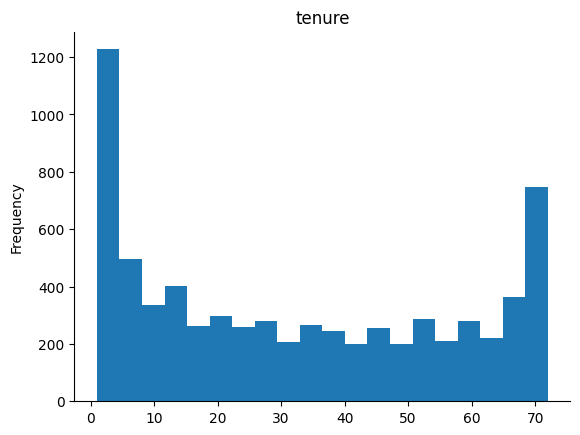

In [ ]:
# @title tenure

from matplotlib import pyplot as plt
wc['tenure'].plot(kind='hist', bins=20, title='tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

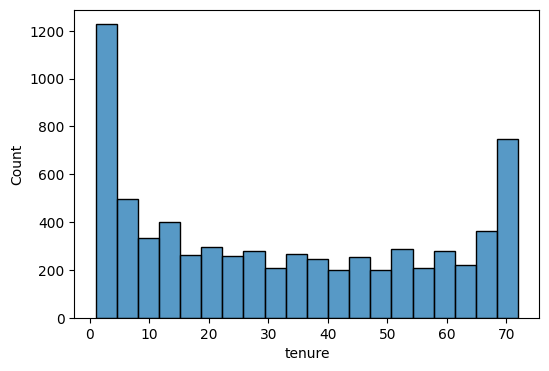

In [ ]:
# Distribution of tenure
fig=plt.figure(figsize=(6,4))
sns.histplot(df['tenure'], bins=20)
plt.xlabel='tenure'
plt.ylabel='Frequency'
plt.show()

In [ ]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

#### Narration
The tenure of individuals in the dataset varies widely, ranging from 1 month to 70 months. The majority of individuals have a tenure of 1 month (209 individuals) or 72 months (also 210 individuals), indicating a significant proportion of new joiners and individuals with long-term commitments. There is a gradual decrease in frequency as tenure increases, with occasional fluctuations in between. This suggests a diverse workforce with varying lengths of service, possibly influenced by factors such as job role, industry trends, and organizational stability.

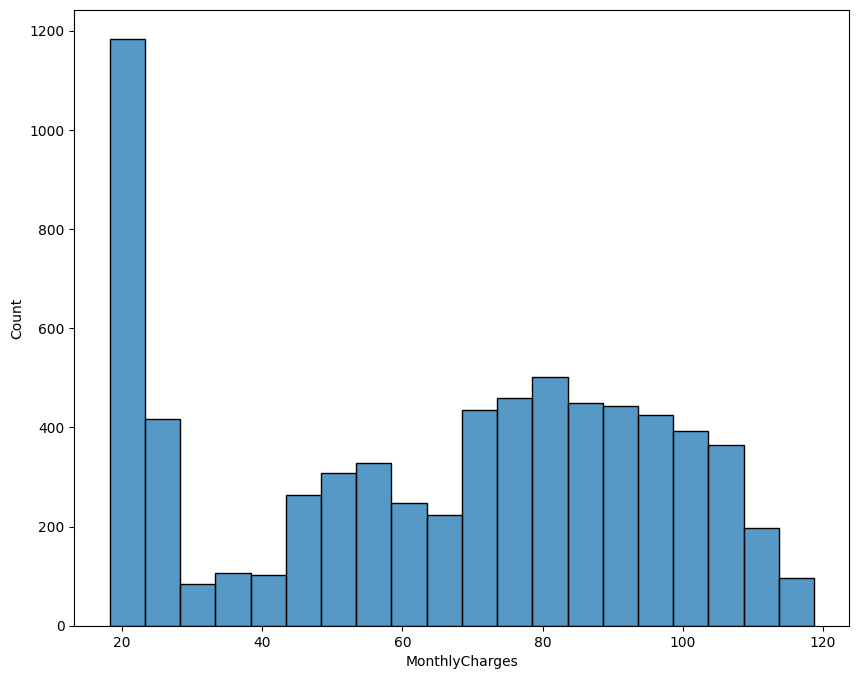

In [ ]:
fig=plt.figure(figsize=(10,8))
sns.histplot(df['MonthlyCharges'], bins=20)
plt.xlabel=('Monthly Charges')
plt.ylabel=('Freaquency')
plt.show()

In [ ]:
df['MonthlyCharges'].mean()

64.79820819112628

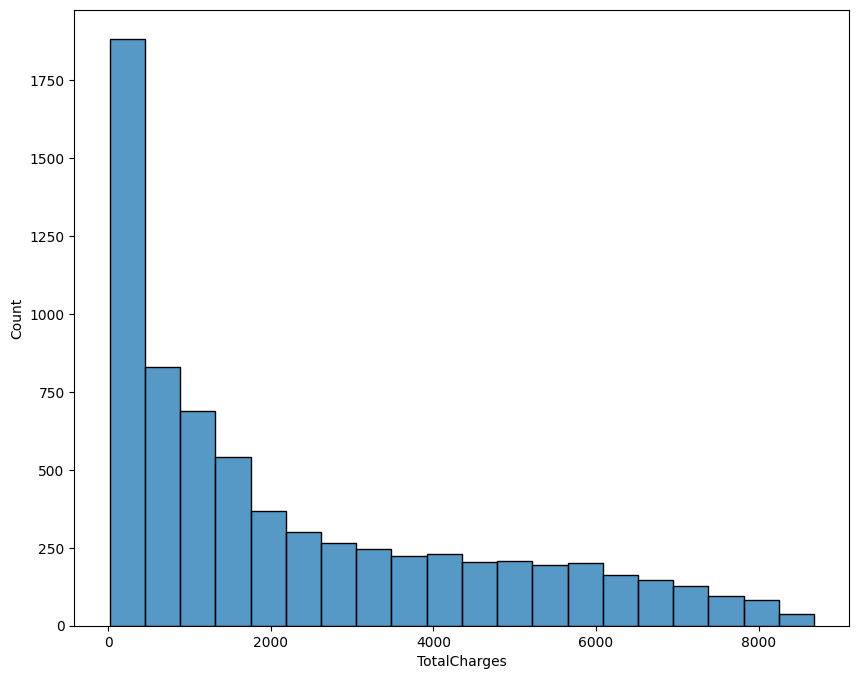

In [ ]:
fig=plt.figure(figsize=(10,8))
sns.histplot(df['TotalCharges'], bins=20)
plt.xlabel=('Total Charges')
plt.ylabel=('Frequency')
plt.show()

In [ ]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85            29     No  
1               Mailed check          56.95          1889     No  
2               Mailed check          53.85           108    Yes  
3  Bank transfer (automatic)          42.30          1840     No  
4           Electronic check          70.70           151    Yes  

[5 rows x 21 columns]

In [ ]:
df=df.drop(columns=['customerID'])
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges          int64
Churn                object
dtype: object

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

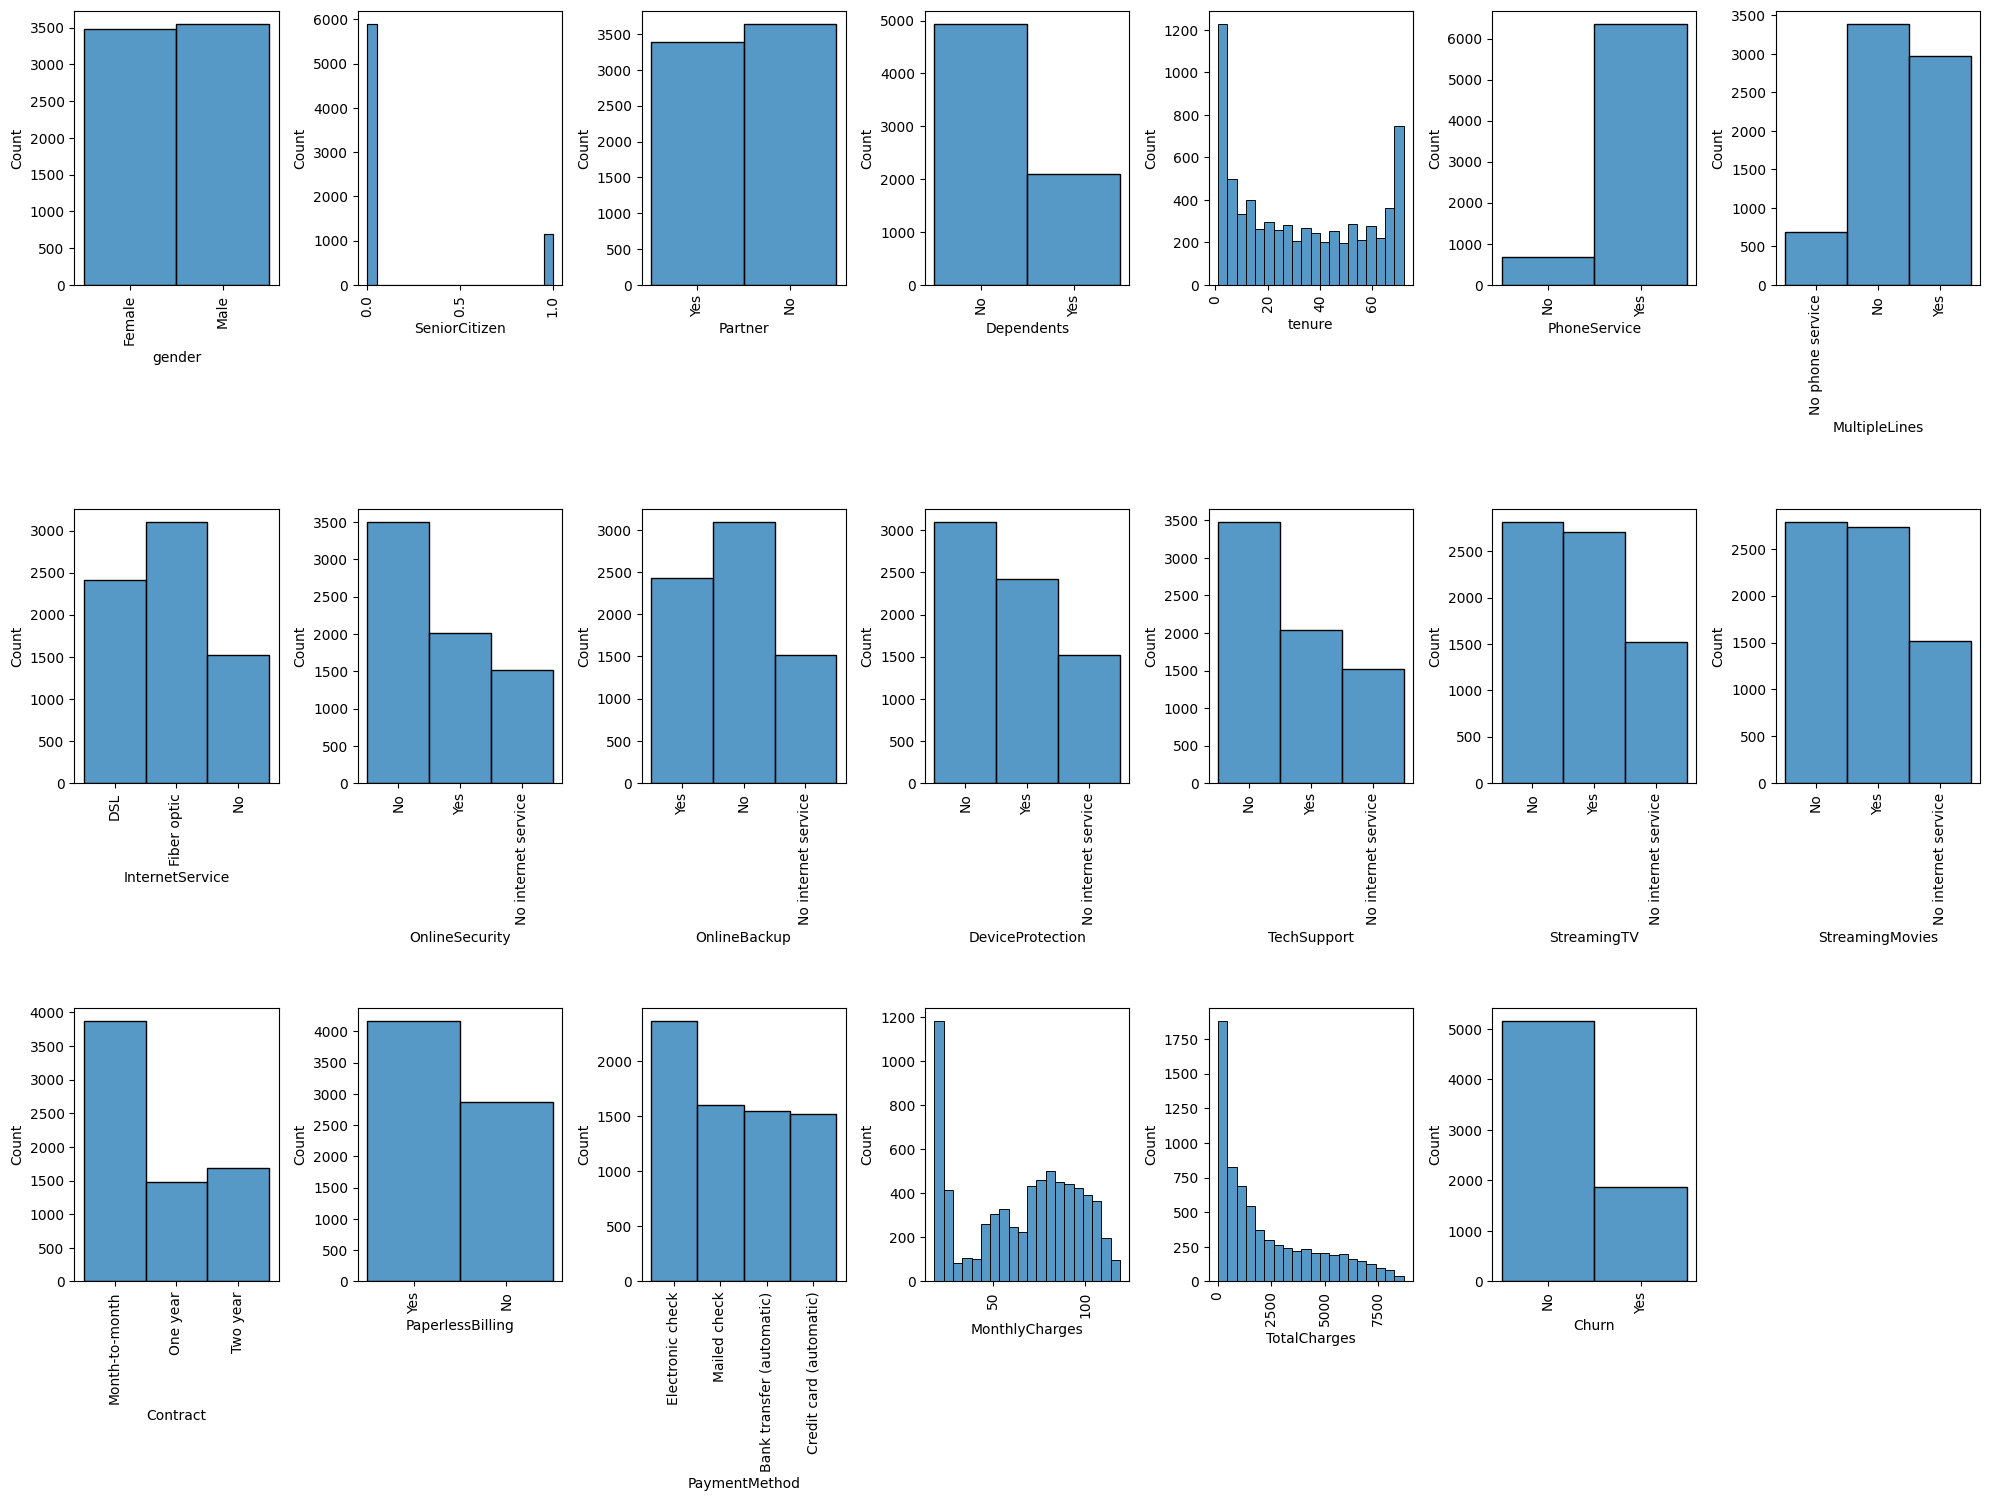

In [ ]:
fig=plt.figure(figsize=(20,18))
for i, column in enumerate(df, 1):
    plt.subplot(4,7,i);
    sns.histplot(df[column],bins=20);
    plt.xticks(rotation=90)
    plt.xlabel=('column')
    plt.ylabel=('Frequency')

    plt.tight_layout()

### Observation
The result of the univariate analysis shows that these features are non- normal distributions. This means that it will have to be transformed or normalized it to make it more normal.


#### Bivariate Analysis

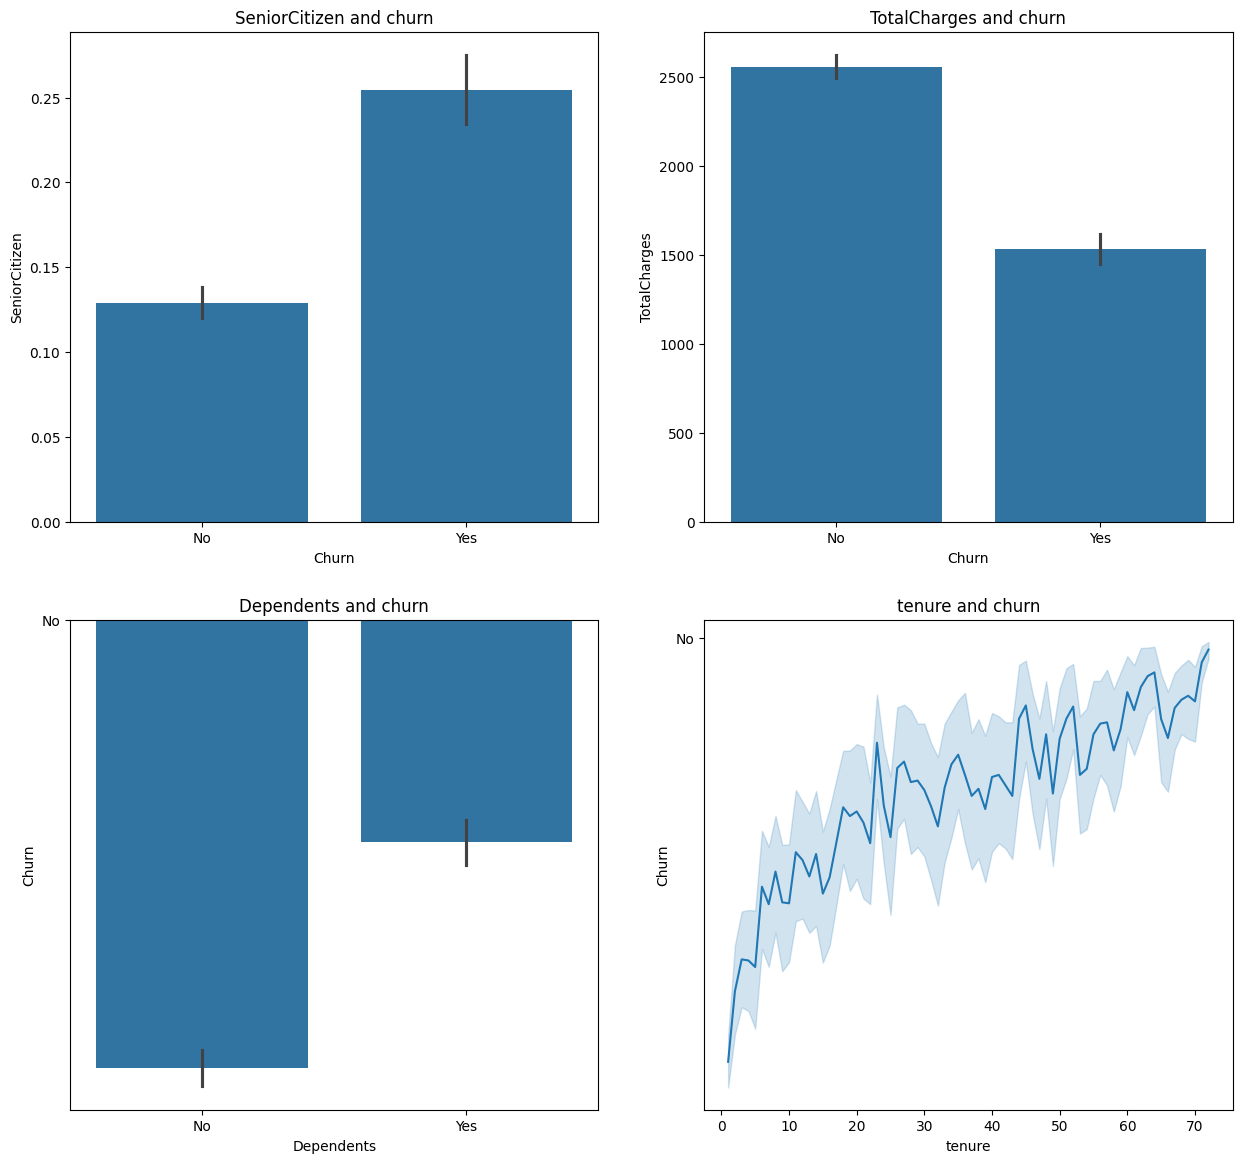

In [ ]:
fig,axs = plt.subplots(nrows=2, ncols=2, figsize=(15,14))

sns.barplot(y='SeniorCitizen', x='Churn', data=df, ax=axs[0,0])
axs[0,0].set_title('SeniorCitizen and churn');
plt.axis

sns.barplot(y='TotalCharges',x='Churn', data=df, ax=axs[0,1])
axs[0,1].set_title('TotalCharges and churn');

sns.barplot(x='Dependents', y='Churn', data=df, ax=axs[1,0])
axs[1,0].set_title('Dependents and churn');

sns.lineplot(x='tenure', y='Churn', data=df, ax=axs[1,1])
axs[1,1].set_title('tenure and churn');

### Observation
**SeniorCitizen and churn :** Negative linear graph shows an increasing number of churn from Senior Citizens

**TotalCharges and churn :** Total charges caused significantly less churn

**Dependents and churn:** Customers without dependants caused more churn than customers with dependants

**Tenure and churn :** Longer tenures showed lesser churn


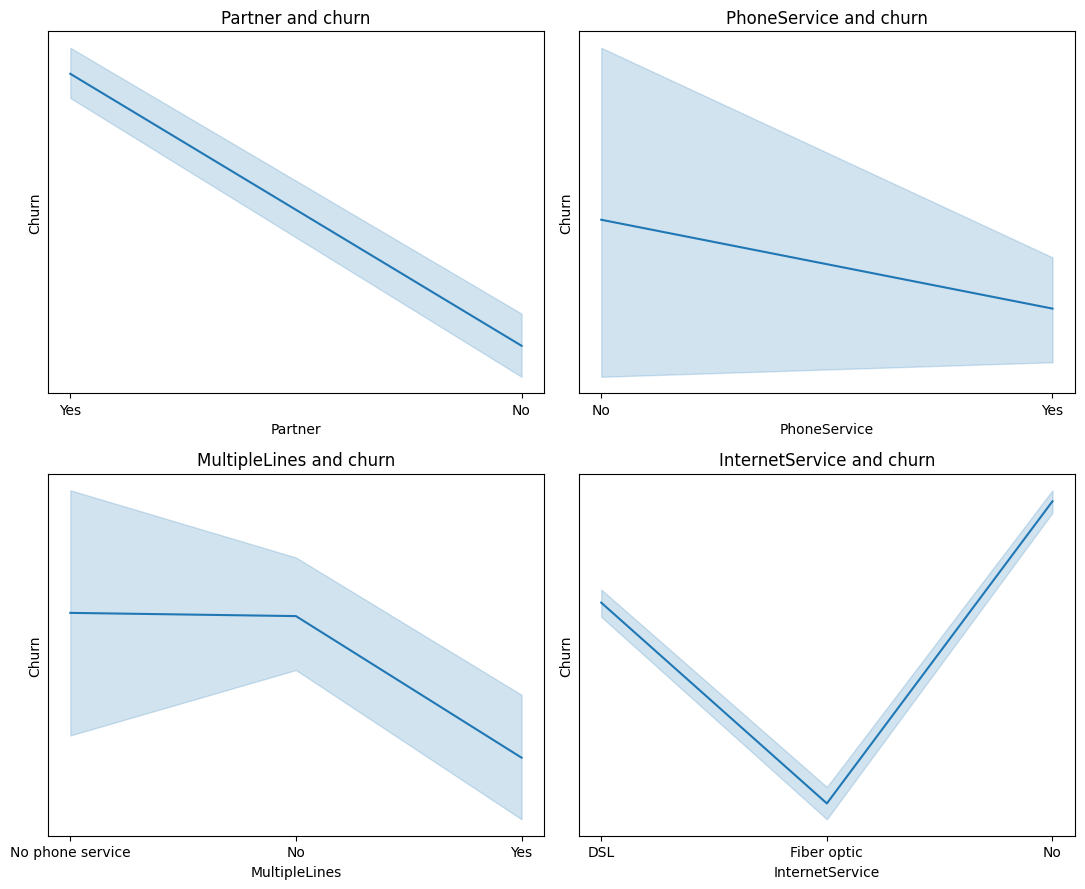

In [ ]:
fig,axs = plt.subplots(nrows=2, ncols=2, figsize=(11,9))

sns.lineplot(x='Partner', y='Churn', data=df, ax=axs[0,0])
axs[0,0].set_title('Partner and churn');


sns.lineplot(x='PhoneService',y='Churn', data=df, ax=axs[0,1])
axs[0,1].set_title('PhoneService and churn');

sns.lineplot(x='MultipleLines', y='Churn', data=df, ax=axs[1,0])
axs[1,0].set_title('MultipleLines and churn');

sns.lineplot(x='InternetService', y='Churn', data=df, ax=axs[1,1])
axs[1,1].set_title('InternetService and churn');

plt.tight_layout()

### Observation
**Partner and churn :** negative linear graph shows an decrease of churn from number of customers with partners increase

**PhoneService and churn :** Decreasing churn from customers without Phone Service to customers with Phone Service. Significant variation is observed

**MultipleLines and churn:** Decreasing churn fron Customers with no phone service. While customers with multiple lines generated less churn. Significant variation is observed


**InternetService and churn:** Customers with no internet service presented no the churn.This is  followed by customers using DSLs. Customers using fiber optics created significant churns.

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

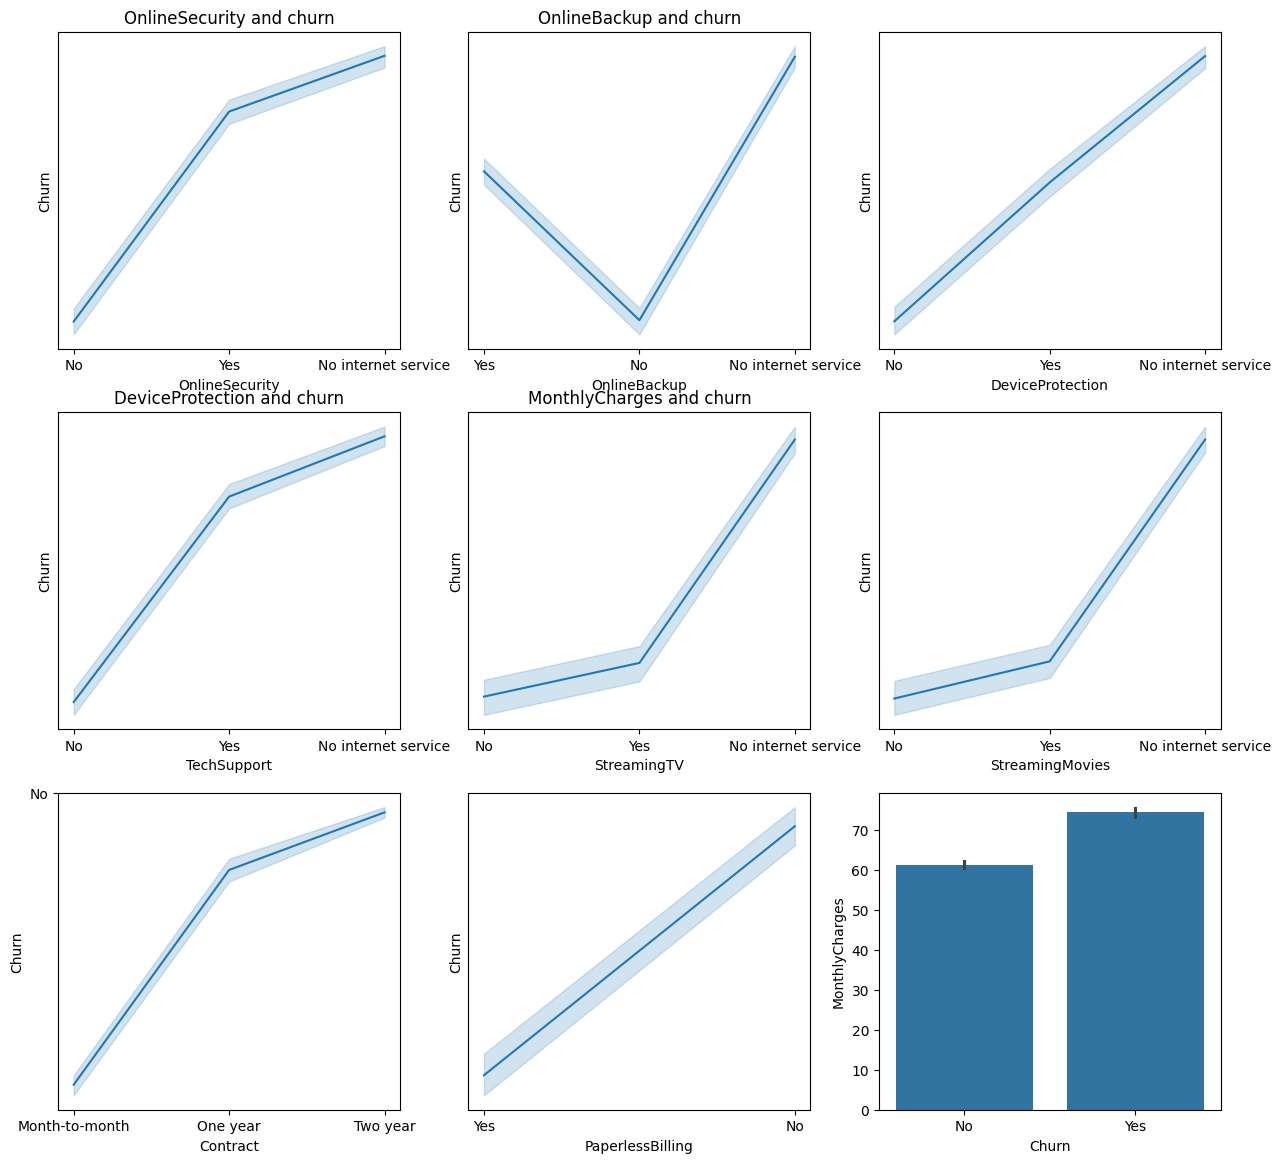

In [ ]:
fig,axs = plt.subplots(nrows=3, ncols=3, figsize=(15,14))

sns.lineplot(x='OnlineSecurity', y='Churn', data=df, ax=axs[0,0])
axs[0,0].set_title('OnlineSecurity and churn');

sns.lineplot(x='OnlineBackup',y='Churn', data=df, ax=axs[0,1])
axs[0,1].set_title('OnlineBackup and churn');

sns.lineplot(x='DeviceProtection', y='Churn', data=df, ax=axs[0,2])
axs[1,0].set_title('DeviceProtection and churn');

sns.lineplot(x='TechSupport', y='Churn', data=df, ax=axs[1,0])
axs[1,1].set_title('TechSupport and churn');

sns.lineplot(x='StreamingTV', y='Churn', data=df, ax=axs[1,1])
axs[1,1].set_title('StreamingTV and churn');

sns.lineplot(x='StreamingMovies', y='Churn', data=df, ax=axs[1,2])
axs[1,1].set_title('StreamingMovies and churn');

sns.lineplot(x='Contract', y='Churn', data=df, ax=axs[2,0])
axs[1,1].set_title('Contract and churn');

sns.lineplot(x='PaperlessBilling', y='Churn', data=df, ax=axs[2,1])
axs[1,1].set_title('PaperlessBilling and churn');

sns.barplot(y='MonthlyCharges', x='Churn', data=df, ax=axs[2,2])
axs[1,1].set_title('MonthlyCharges and churn');


### Observation
**OnlineSecurity and churn :** most of the churn comes from customers with no online security. The least churns come from customers with no internet service.

**OnlineBackup and churn:** Most of the churn comes from customers with no Online backup, followed by customers with Online backup. The least churns come from customers with no internet service.

**DeviceProtection and churn :** Most of the churn comes from customers with no device protection, followed by customers with Device protection. The least churns come from customers with no internet service.

**TechSupport and churn:** Customers with no Tech Support presented churns in the category, this is followed by customers that have tech support. Customers with no internet service did not generate churn.


**StreamingTV and churn:** Customers who were not TV streamers presented churns, followed by customers who were TV Streamers. Customers with no internert service generated no churns.


**StreamingMovies and churn:** Customers who were not movie streamers presented churns, followed by customers who were movie Streamers. Customers with no internert service generated no churns.


**Contract and churn:** Month to month Customers generated churns. Lesser churns wer generated by customers with one year contracts. Two year contract customers generated no churns.


**PaperlessBilling and churn:** Customers with no PaperlessBilling did not present any churn. While customers with PaperlessBilling caused significant churns.


**MonthlyCharges and churn:** Customers with higher monthly charges from $65 and above generated more churns than customers with lower monthly charges.

### Conclusion

There should be more focus on customers with no internet service.

#### Multivariate analysis

In [ ]:
#churn
def num_Churn(Churn):
    if Churn =='Yes':
        return 0
    else:
        return 1
df['num_Churn']= df['Churn'].apply(num_Churn)
print(df['num_Churn'].value_counts())


1    5163
0    1869
Name: num_Churn, dtype: int64


In [ ]:
#Pairplot: select features
wc=df[['tenure', 'MonthlyCharges', 'TotalCharges']]#,'Churn']]
wc.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'num_Churn'],
      dtype='object')

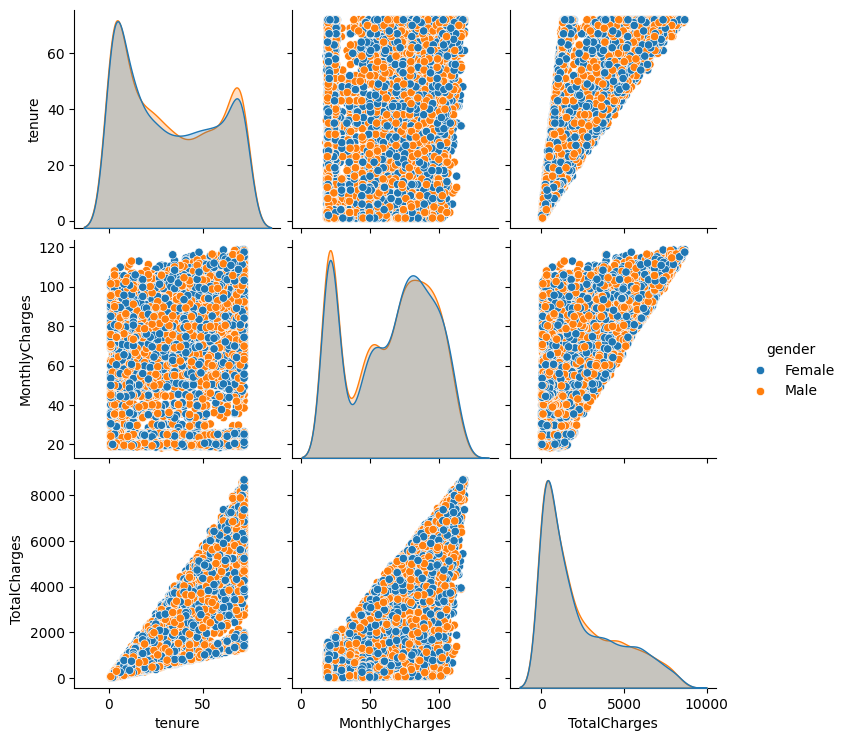

In [ ]:
sns.pairplot(df,vars=wc, hue='gender');

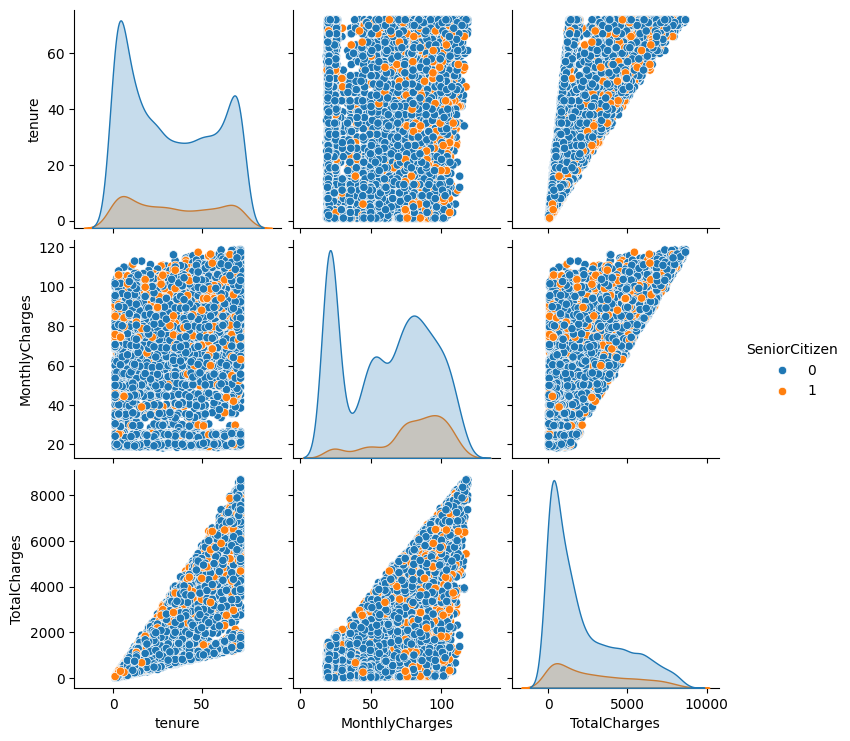

In [ ]:
sns.pairplot(data=df, hue='SeniorCitizen',vars=wc);

### Observation
This shows that most of the customers interacting with the company are not senior citizens.

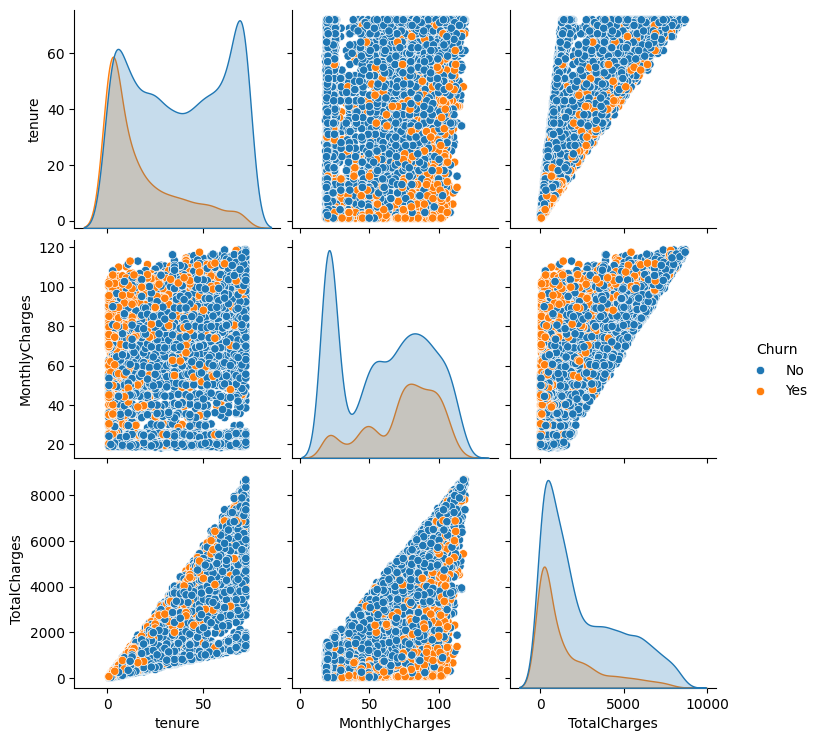

In [ ]:
sns.pairplot(data=df, hue='Churn',vars=wc);

### Observation
These features show Increasing and steady number of customers that do not churn. This data is consistent with the exploration carried out in the Bivariate analysis.

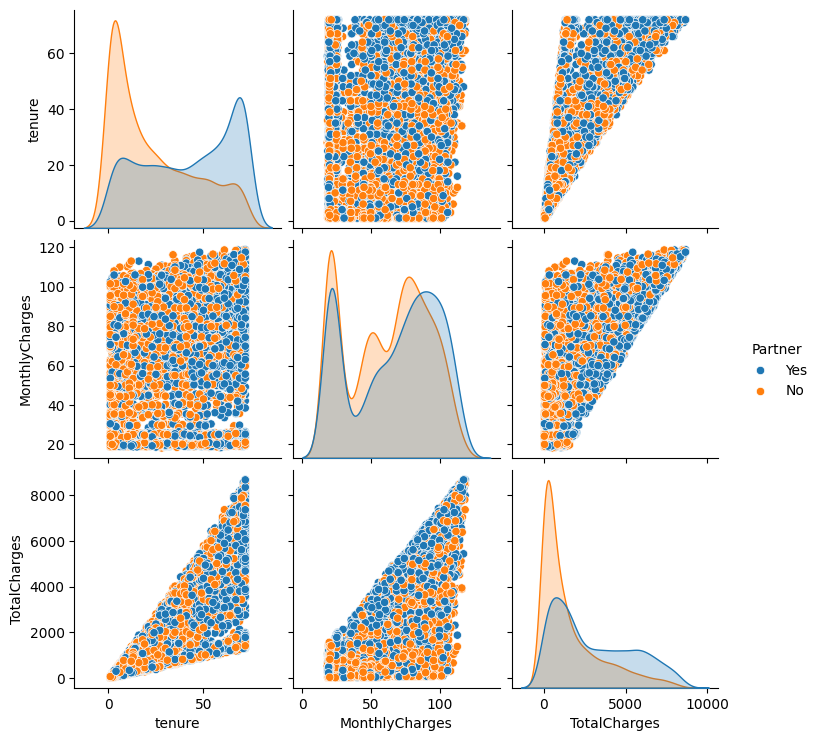

In [ ]:
sns.pairplot(data=df, hue='Partner',vars=wc);

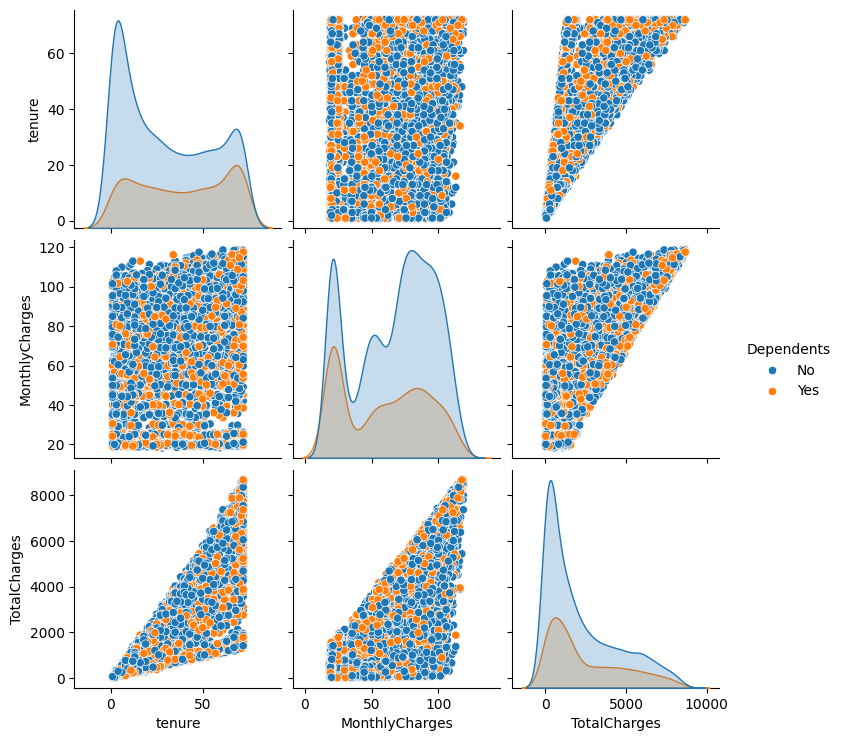

In [ ]:
sns.pairplot(data=df, hue='Dependents',vars=wc);

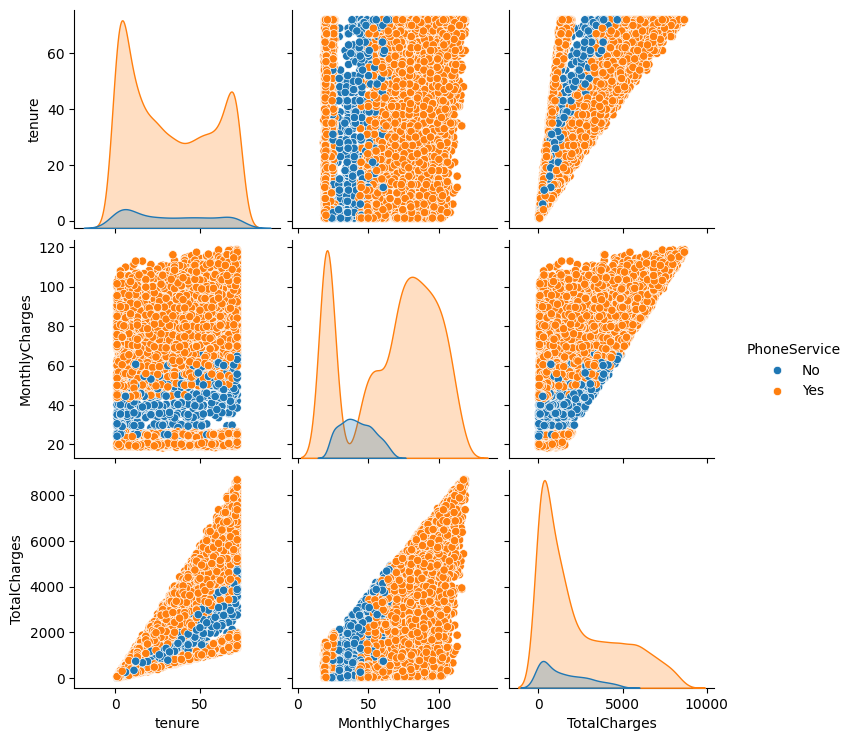

In [ ]:
sns.pairplot(data=df, hue='PhoneService',vars=wc);

### Observation
A significant population customers utilize phone services. Significant linear inreases are observed.

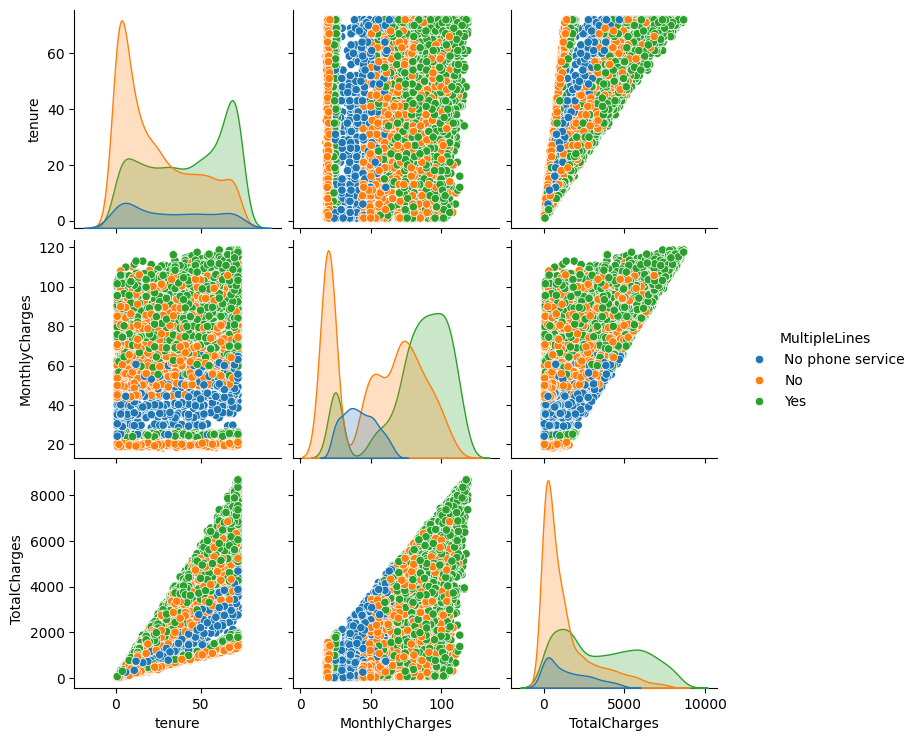

In [ ]:
sns.pairplot(data=df, hue='MultipleLines',vars=wc);

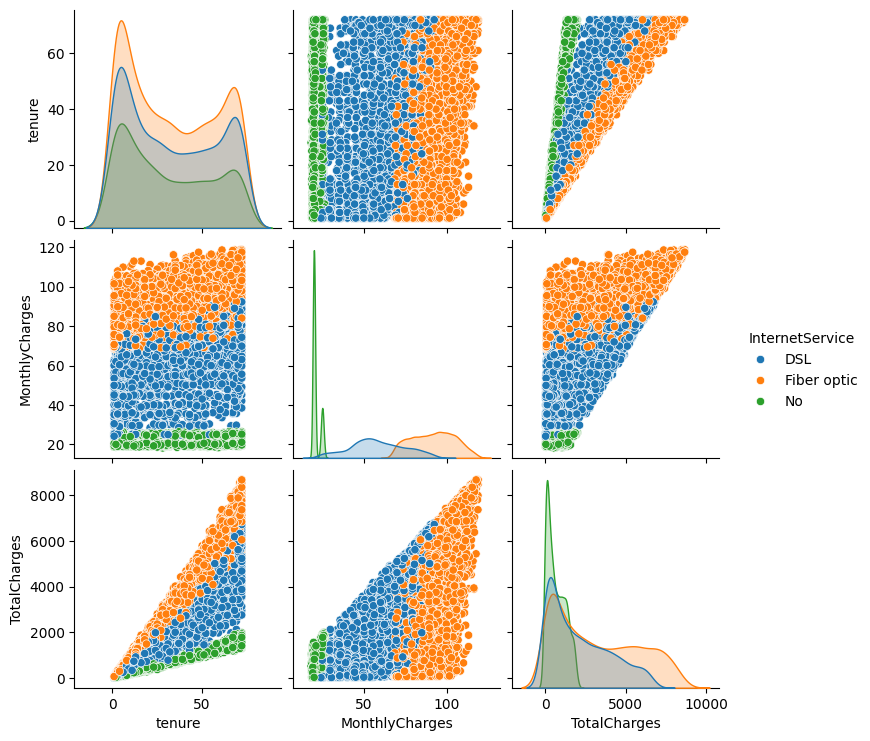

In [ ]:
sns.pairplot(data=df, hue='InternetService',vars=wc);

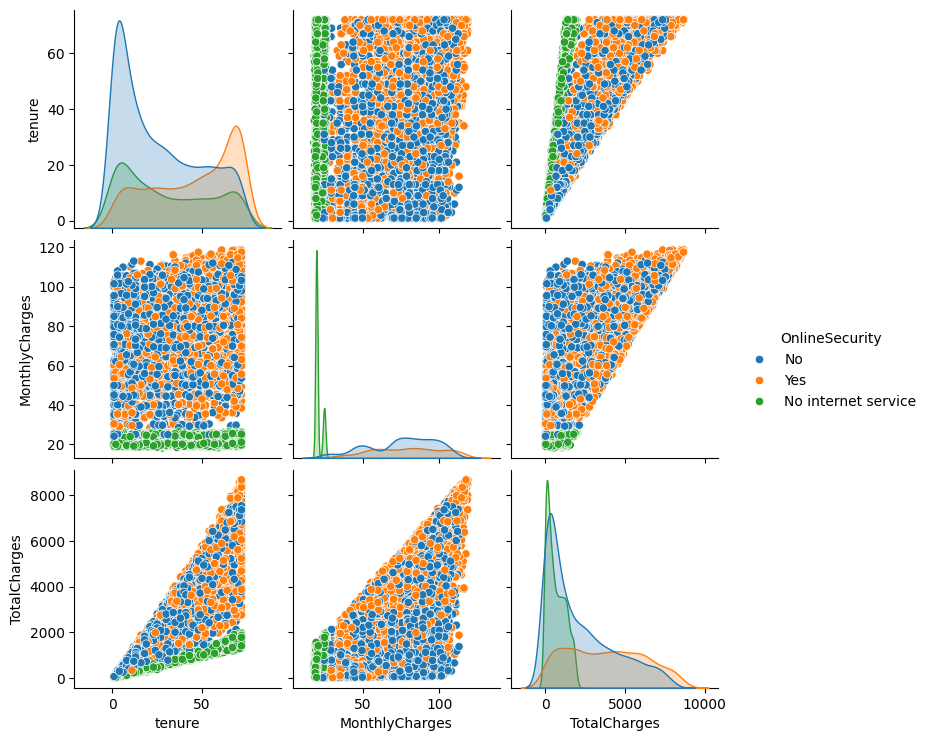

In [ ]:
sns.pairplot(data=df, hue='OnlineSecurity',vars=wc);

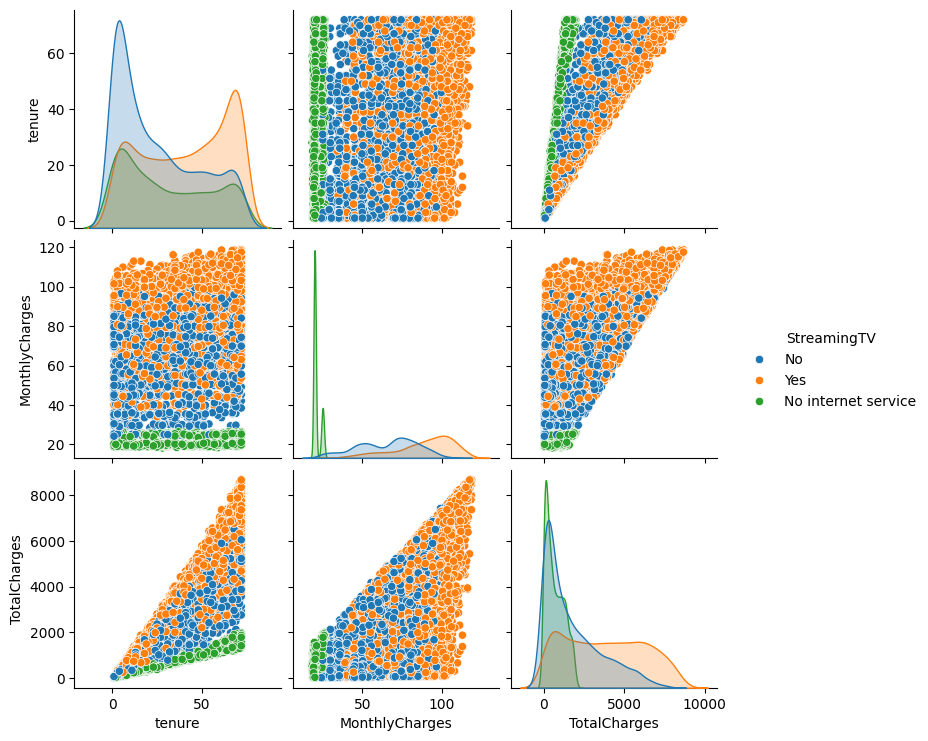

In [ ]:
sns.pairplot(data=df, hue='StreamingTV',vars=wc);

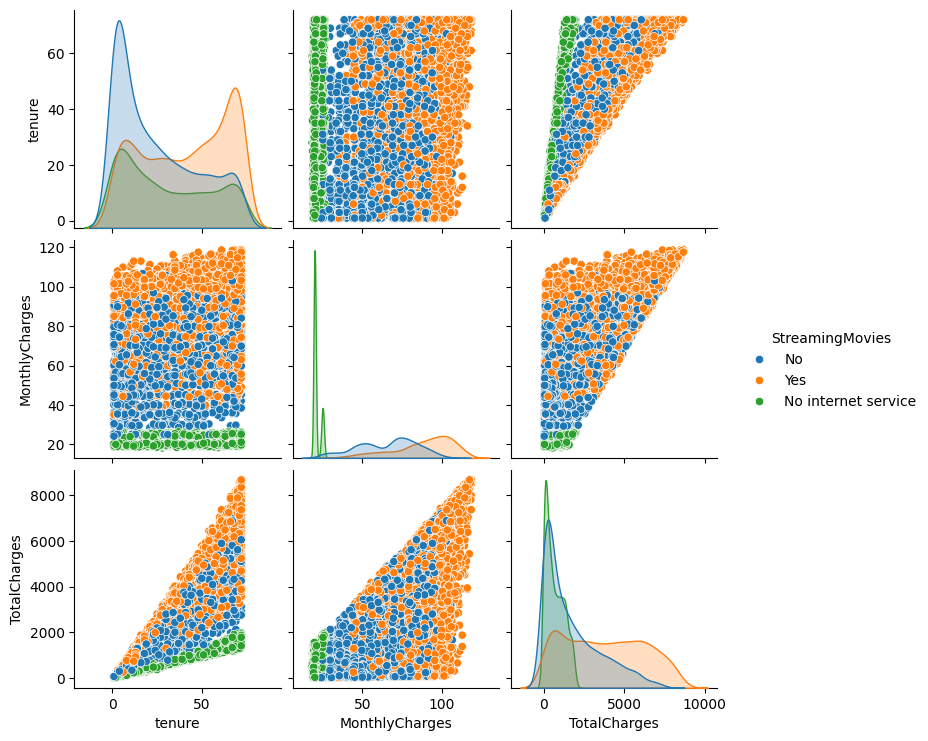

In [ ]:
sns.pairplot(data=df, hue='StreamingMovies',vars=wc);

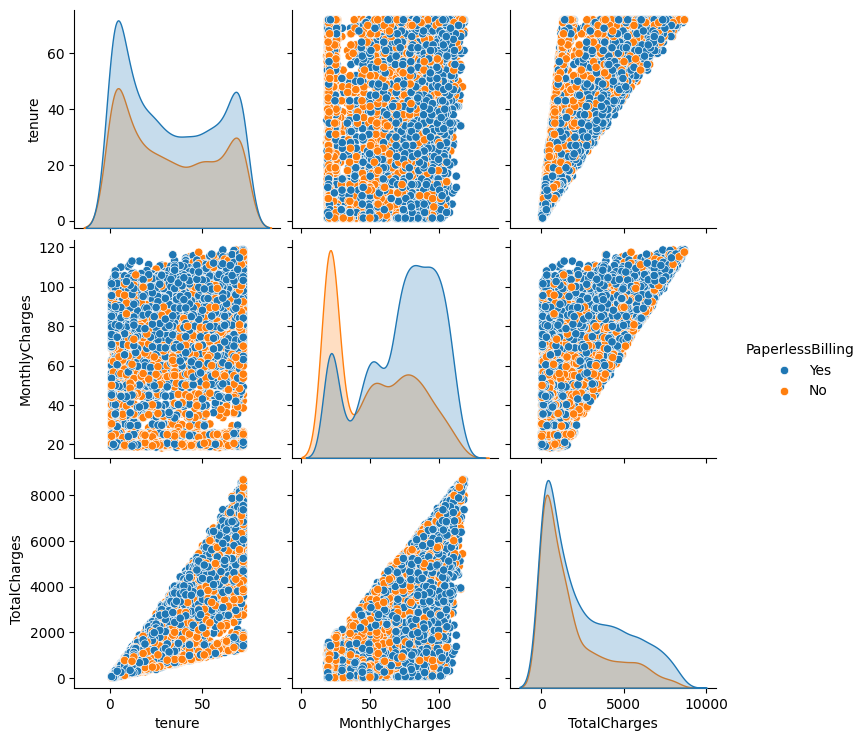

In [ ]:
sns.pairplot(data=df, hue='PaperlessBilling',vars=wc);

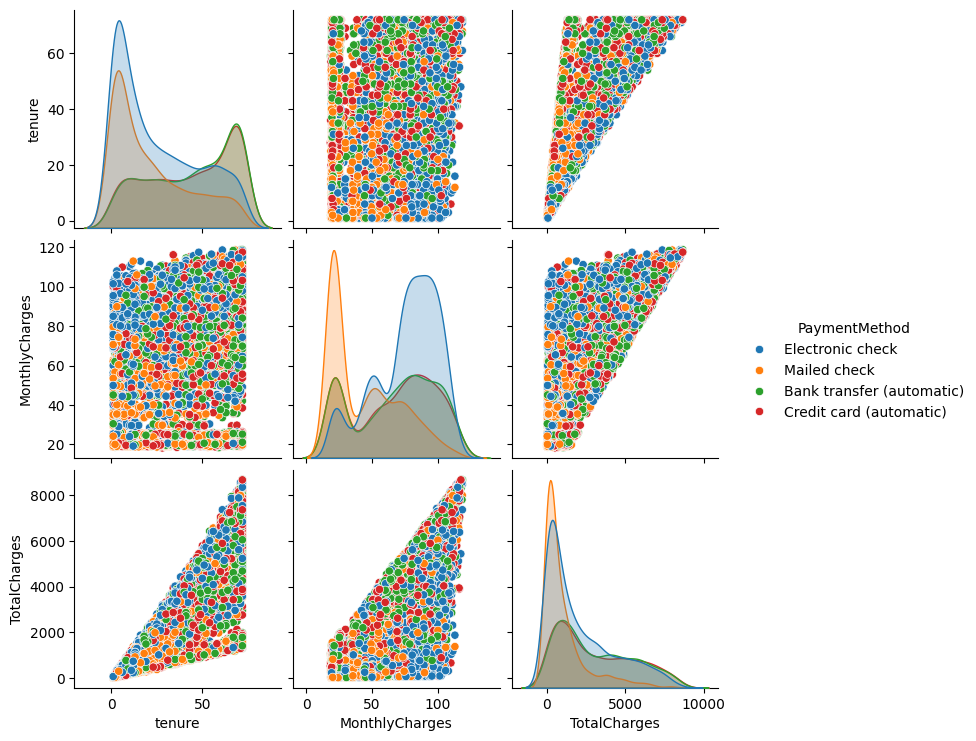

In [ ]:
sns.pairplot(data=df, hue='PaymentMethod',vars=wc);

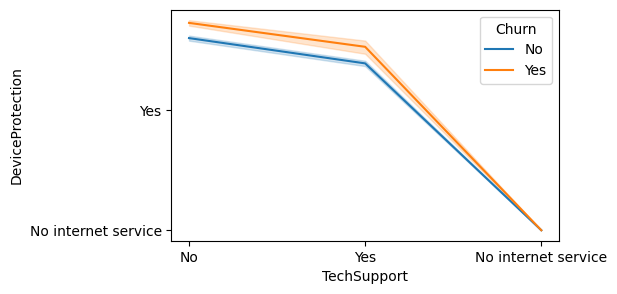

In [ ]:
plt.figure(figsize=(5,3))
sns.lineplot(y='DeviceProtection',x='TechSupport',data=df, hue='Churn')
#plt.xticks(rotation=90)
plt.show()

### Observation
The graph matches the data from the bivariate analysis. It shows that customers with no internet service generate the least churns

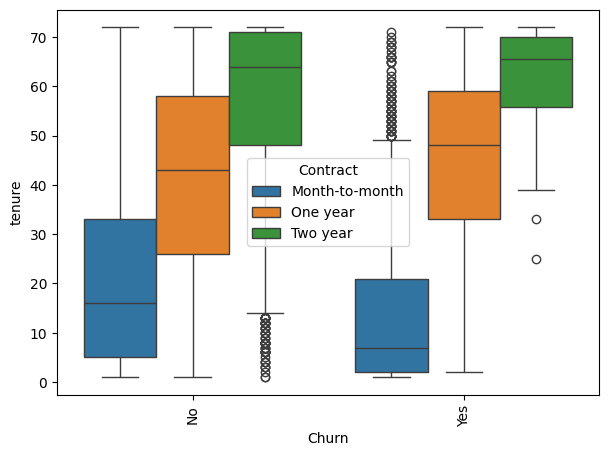

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Churn',y='tenure',data=df, hue='Contract')
plt.xticks(rotation=90)
plt.show()

### Observation
This is a conisderable information as it shows that we cannot state for certain that customers who have been with the company for more than 2 years will not leave.

In [ ]:
#gender
def num_gender(gender):
    if gender =='Female':
        return 0
    else:
        return 1
df['num_gender']= df['gender'].apply(num_gender)
#print(df['num_gender'].value_counts())

#Partner
def num_Partner(Partner):
    if Partner =='Yes':
        return 0
    else:
        return 1
df['num_Partner']= df['Partner'].apply(num_Partner)
#print(df['num_Partner'].value_counts())

#Dependents
def num_Dependents(Dependents):
    if Dependents =='Yes':
        return 0
    else:
        return 1
df['num_Dependents']= df['Dependents'].apply(num_Dependents)
#print(df['num_churn'].value_counts())

#PhoneService
def num_PhoneService(PhoneService):
    if PhoneService =='Yes':
        return 0
    else:
        return 1
df['num_PhoneService']= df['PhoneService'].apply(num_PhoneService)

In [ ]:
df.T

0             1               2     \
gender                      Female          Male            Male   
SeniorCitizen                    0             0               0   
Partner                        Yes            No              No   
Dependents                      No            No              No   
tenure                           1            34               2   
PhoneService                    No           Yes             Yes   
MultipleLines     No phone service            No              No   
InternetService                DSL           DSL             DSL   
OnlineSecurity                  No           Yes             Yes   
OnlineBackup                   Yes            No             Yes   
DeviceProtection                No           Yes              No   
TechSupport                     No            No              No   
StreamingTV                     No            No              No   
StreamingMovies                 No            No              No   
Contract            Month-to-month      One year  Month-to-month   
PaperlessBilling               Yes            No             Yes   
PaymentMethod     Electronic check  Mailed check    Mailed check   
MonthlyCharges               29.85         56.95           53.85   
TotalCharges                    29          1889             108   
Churn                           No            No             Yes   
num_Churn                        1             1               0   
num_gender                       0             1               1   
num_Partner                      0             1               1   
num_Dependents                   1             1               1   
num_PhoneService                 1             0               0   

                                       3                 4     \
gender                                 Male            Female   
SeniorCitizen                             0                 0   
Partner                                  No                No   
Dependents                               No                No   
tenure                                   45                 2   
PhoneService                             No               Yes   
MultipleLines              No phone service                No   
InternetService                         DSL       Fiber optic   
OnlineSecurity                          Yes                No   
OnlineBackup                             No                No   
DeviceProtection                        Yes                No   
TechSupport                             Yes                No   
StreamingTV                              No                No   
StreamingMovies                          No                No   
Contract                           One year    Month-to-month   
PaperlessBilling                         No               Yes   
PaymentMethod     Bank transfer (automatic)  Electronic check   
MonthlyCharges                         42.3              70.7   
TotalCharges                           1840               151   
Churn                                    No               Yes   
num_Churn                                 1                 0   
num_gender                                1                 0   
num_Partner                               1                 1   
num_Dependents                            1                 1   
num_PhoneService                          1                 0   

                              5                        6                 7     \
gender                      Female                     Male            Female   
SeniorCitizen                    0                        0                 0   
Partner                         No                       No                No   
Dependents                      No                      Yes                No   
tenure                           8                       22                10   
PhoneService                   Yes                      Yes                No   
Mul

In [ ]:
#Label- a binary response where the churn is either 1=yes,0=no

In [ ]:
wc.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [ ]:
wc=df[['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges','num_gender','num_Partner','num_Dependents','num_PhoneService']]

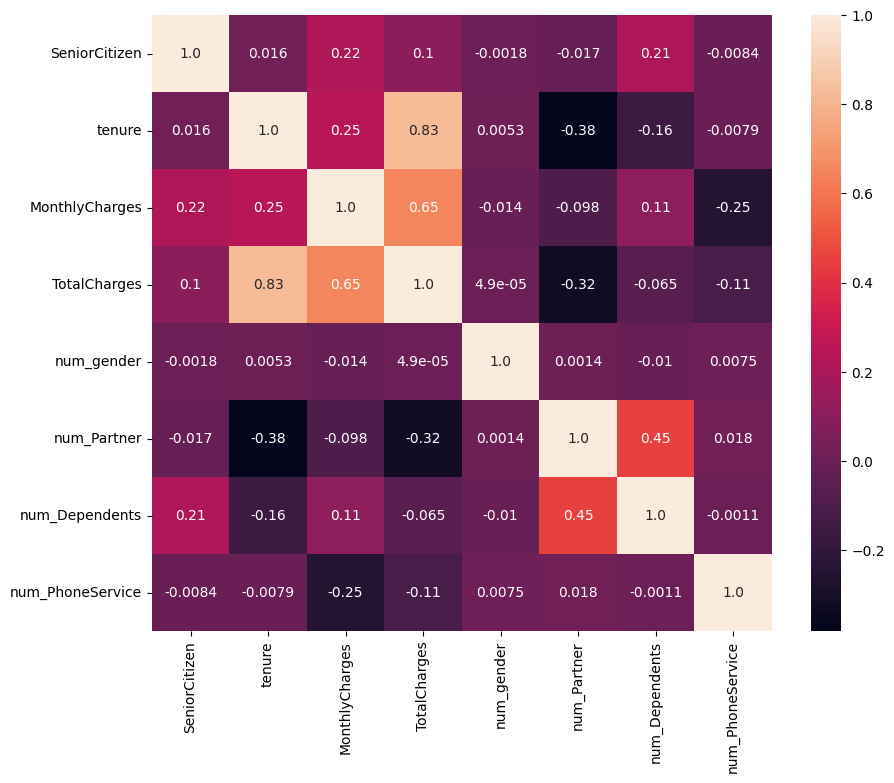

In [ ]:
Hm= wc.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(Hm,annot=True,fmt='.2');

### Observation

Strong correlation between Total Charges and tenure, Total charges and Monthly chages and finally Partners and dependants.This is not far from the previous observations from previous analysis.

However, in this correlation chart, a significant relationship to the target(num_churn) is what is what is most desired in order to establish a strong correlation. A proper correlation would be identified between +o and +1 and that is shown across the correlation map.
Relative to the target, we can see that the **Total Charges**, and **tenure** have significant correlations. Hence, they can be regarded as valuable markers for predicting churns.

All other features may not be direct causes of heart disease as they have negative relationships.

**Some Insights Derived from the EDA**

*   People tend to leave when they have month-to-month contracts.
*   If there's no online security or tech support, customers are more likely to leave.

* People tend to stay longer when they have long-term contracts.
* If the subscription doesn't include internet, there's less chance of people leaving.
* New subscribers in their first year tend to stop using the service.
* Customers with fiber optics internet are more likely to leave



#### Feature Engineering

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'num_Churn', 'num_gender',
       'num_Partner', 'num_Dependents', 'num_PhoneService'],
      dtype='object')

In [1]:
# Created interaction features
wc['num_Partner/num_Dependents']=wc['num_Partner']*wc['num_Dependents']
wc['SeniorCitizen/tenure']=wc['SeniorCitizen']*wc['tenure']
wc['MonthlyCharges/TotalCharges']=wc['MonthlyCharges']*wc['TotalCharges']
#wc['MCxTC/churn']=(wc['MonthlyCharges']*wc['TotalCharges'])/(wc['num_Chrun'])

#wc['num_PhoneService/num_Chrun']=(wc['num_PhoneService']/wc['num_Chrun'])*100


#adding thes new features to the selected features'sel_feat' because the variable holds my working features
wc.insert(12,'num_Partner/num_Dependents','MonthlyCharges/TotalCharges')
wc

In [ ]:
wc.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'num_gender', 'num_Partner', 'num_Dependents', 'num_PhoneService',
       'num_Partner/num_Dependents', 'SeniorCitizen/tenure',
       'MonthlyCharges/TotalCharges'],
      dtype='object')

In [ ]:
wc1=wc[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'num_gender', 'num_Partner', 'num_Dependents',
       'num_PhoneService', 'num_Partner/num_Dependents',
       'SeniorCitizen/tenure', 'MonthlyCharges/TotalCharges']]
wc1

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  num_gender  \
0                 0       1           29.85            29           0   
1                 0      34           56.95          1889           1   
2                 0       2           53.85           108           1   
3                 0      45           42.30          1840           1   
4                 0       2           70.70           151           0   
...             ...     ...             ...           ...         ...   
7038              0      24           84.80          1990           1   
7039              0      72          103.20          7362           0   
7040              0      11           29.60           346           0   
7041              1       4           74.40           306           1   
7042              0      66          105.65          6844           1   

      num_Partner  num_Dependents  num_PhoneService  \
0               0               1                 1   
1               1               1                 0   
2               1               1                 0   
3               1               1                 1   
4               1               1                 0   
...           ...             ...               ...   
7038            0               0                 0   
7039            0               0                 0   
7040            0               0                 1   
7041            0               1                 0   
7042            1               1                 0   

      num_Partner/num_Dependents  SeniorCitizen/tenure  \
0                              0                     0   
1                              1                     0   
2                              1                     0   
3                              1                     0   
4                              1                     0   
...                          ...                   ...   
7038                           0                     0   
7039                           0                     0   
7040                           0                     0   
7041                           0                     4   
7042                           1                     0   

      MonthlyCharges/TotalCharges  
0                          865.65  
1                       107578.55  
2                         5815.80  
3                        77832.00  
4                        10675.70  
...                           ...  
7038                    168752.00  
7039                    759758.40  
7040                     10241.60  
7041                     22766.40  
7042                    723068.60  

[7032 rows x 11 columns]

In [ ]:
#seperated testing columns
churn=df[['num_Churn']]
churn

num_Churn
0             1
1             1
2             0
3             1
4             0
...         ...
7038          1
7039          1
7040          1
7041          0
7042          1

[7032 rows x 1 columns]

In [ ]:
# Normalize the data
scaler = MinMaxScaler()

wc1['Scaled_tenure'] = scaler.fit_transform(wc1['tenure'].values.reshape(-1, 1))
wc1['Scaled_MonthlyCharges'] = scaler.fit_transform(wc1['MonthlyCharges'].values.reshape(-1, 1))
wc1['Scaled_TotalCharges'] = scaler.fit_transform(wc1['TotalCharges'].values.reshape(-1, 1))
wc1['Scaled_num_Partner'] = scaler.fit_transform(wc1['num_Partner'].values.reshape(-1, 1))
wc1['Scaled_num_Dependents'] = scaler.fit_transform(wc1['num_Dependents'].values.reshape(-1, 1))
wc1['Scaled_num_PhoneService'] = scaler.fit_transform(wc1['num_PhoneService'].values.reshape(-1, 1))
wc1['Scaled_num_Partner/num_Dependents'] = scaler.fit_transform(wc1['num_Partner/num_Dependents'].values.reshape(-1, 1))
wc1['Scaled_SeniorCitizen/tenure'] = scaler.fit_transform(wc1['SeniorCitizen/tenure'].values.reshape(-1, 1))
wc1['Scaled_MonthlyCharges/TotalCharges'] = scaler.fit_transform(wc1['MonthlyCharges/TotalCharges'].values.reshape(-1, 1))

In [ ]:
#wc1.drop(columns=['Scaled_num_gender'],inplace=True)
wc1.T

0              1            2     \
SeniorCitizen                         0.000000       0.000000     0.000000   
tenure                                1.000000      34.000000     2.000000   
MonthlyCharges                       29.850000      56.950000    53.850000   
TotalCharges                         29.000000    1889.000000   108.000000   
num_gender                            0.000000       1.000000     1.000000   
num_Partner                           0.000000       1.000000     1.000000   
num_Dependents                        1.000000       1.000000     1.000000   
num_PhoneService                      1.000000       0.000000     0.000000   
num_Partner/num_Dependents            0.000000       1.000000     1.000000   
SeniorCitizen/tenure                  0.000000       0.000000     0.000000   
MonthlyCharges/TotalCharges         865.650000  107578.550000  5815.800000   
Scaled_tenure                         0.000000       0.464789     0.014085   
Scaled_MonthlyCharges                 0.115423       0.385075     0.354229   
Scaled_TotalCharges                   0.001269       0.215901     0.010385   
Scaled_num_Partner                    0.000000       1.000000     1.000000   
Scaled_num_Dependents                 1.000000       1.000000     1.000000   
Scaled_num_PhoneService               1.000000       0.000000     0.000000   
Scaled_num_Partner/num_Dependents     0.000000       1.000000     1.000000   
Scaled_SeniorCitizen/tenure           0.000000       0.000000     0.000000   
Scaled_MonthlyCharges/TotalCharges    0.000512       0.104171     0.005321   

                                            3             4             5     \
SeniorCitizen                           0.000000      0.000000      0.000000   
tenure                                 45.000000      2.000000      8.000000   
MonthlyCharges                         42.300000     70.700000     99.650000   
TotalCharges                         1840.000000    151.000000    820.000000   
num_gender                              1.000000      0.000000      0.000000   
num_Partner                             1.000000      1.000000      1.000000   
num_Dependents                          1.000000      1.000000      1.000000   
num_PhoneService                        1.000000      0.000000      0.000000   
num_Partner/num_Dependents              1.000000      1.000000      1.000000   
SeniorCitizen/tenure                    0.000000      0.000000      0.000000   
MonthlyCharges/TotalCharges         77832.000000  10675.700000  81713.000000   
Scaled_tenure                           0.619718      0.014085      0.098592   
Scaled_MonthlyCharges                   0.239303      0.521891      0.809950   
Scaled_TotalCharges                     0.210247      0.015347      0.092546   
Scaled_num_Partner                      1.000000      1.000000      1.000000   
Scaled_num_Dependents                   1.000000      1.000000      1.000000   
Scaled_num_PhoneService                 1.000000      0.000000      0.000000   
Scaled_num_Partner/num_Dependents       1.000000      1.000000      1.000000   
Scaled_SeniorCitizen/tenure             0.000000      0.000000      0.000000   
Scaled_MonthlyCharges/TotalCharges      0.075276      0.010041      0.079046   

                                             6            7              8     \
SeniorCitizen                            0.000000     0.000000       0.000000   
tenure                                  22.000000    10.000000      28.000000   
MonthlyCharges                          89.100000    29.750000     104.800000   
TotalCharges                          1949.000000   301.000000    3046.000000   
num_gender                               1.000000     0.000000       0.000000   
num_Partner                              1.000000     1.000000       0.000000   
num_Dependents                           0.000000     1.000000       1.000000   
num_PhoneService                         0.000000     1.000000       0.000

In [ ]:
df_dummies = pd.get_dummies(df)
df_dummies.to_csv('updated_churn_encoded.csv')

In [ ]:
new_df = df_dummies.copy()
new_df

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  num_Churn  \
0                 0       1           29.85            29          1   
1                 0      34           56.95          1889          1   
2                 0       2           53.85           108          0   
3                 0      45           42.30          1840          1   
4                 0       2           70.70           151          0   
...             ...     ...             ...           ...        ...   
7038              0      24           84.80          1990          1   
7039              0      72          103.20          7362          1   
7040              0      11           29.60           346          1   
7041              1       4           74.40           306          0   
7042              0      66          105.65          6844          1   

      num_gender  num_Partner  num_Dependents  num_PhoneService  \
0              0            0               1                 1   
1              1            1               1                 0   
2              1            1               1                 0   
3              1            1               1                 1   
4              0            1               1                 0   
...          ...          ...             ...               ...   
7038           1            0               0                 0   
7039           0            0               0                 0   
7040           0            0               0                 1   
7041           1            0               1                 0   
7042           1            1               1                 0   

      gender_Female  ...  Contract_One year  Contract_Two year  \
0                 1  ...                  0                  0   
1                 0  ...                  1                  0   
2                 0  ...                  0                  0   
3                 0  ...                  1                  0   
4                 1  ...                  0                  0   
...             ...  ...                ...                ...   
7038              0  ...                  1                  0   
7039              1  ...                  1                  0   
7040              1  ...                  0                  0   
7041              0  ...                  0                  0   
7042              0  ...                  0                  1   

      PaperlessBilling_No  PaperlessBilling_Yes  \
0                       0                     1   
1                       1                     0   
2                       0                     1   
3                       1                     0   
4                       0                     1   
...                   ...                   ...   
7038                    0                     1   
7039                    0                     1   
7040                    0                     1   
7041                    0                     1   
7042                    0                     1   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7038                                        0   
7039                                        0   
7040                                        0   
7041                                        0   
7042                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               1   
1                                         0                               0   
2                                         0                               0   
3                        

### Model Building

In [ ]:
# Spliting the dataset into training and testing sets - X = Questions, Y = Answers.
#testing with 25% of the size and training with 75%
X=wc1
y=churn
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=4)

In [ ]:
X_test

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  num_gender  \
6036              0      53          110.50          5835           0   
1204              0      18           25.55           467           1   
5717              1      69           56.55          3952           1   
1739              0       1           69.90            69           1   
4981              0      14           50.75           712           1   
...             ...     ...             ...           ...         ...   
6989              0      20           76.00          1588           0   
3976              0       4           24.45            86           0   
1911              0      72          106.10          7657           0   
6819              1      55           98.80          5617           1   
6853              0      54          111.10          6014           0   

      num_Partner  num_Dependents  num_PhoneService  \
6036            0               1                 0   
1204            0               0                 1   
5717            0               1                 1   
1739            1               1                 0   
4981            1               1                 1   
...           ...             ...               ...   
6989            0               0                 0   
3976            1               1                 1   
1911            0               0                 0   
6819            1               1                 0   
6853            1               1                 0   

      num_Partner/num_Dependents  SeniorCitizen/tenure  \
6036                           0                     0   
1204                           0                     0   
5717                           0                    69   
1739                           1                     0   
4981                           1                     0   
...                          ...                   ...   
6989                           0                     0   
3976                           1                     0   
1911                           0                     0   
6819                           1                    55   
6853                           1                     0   

      MonthlyCharges/TotalCharges  Scaled_tenure  Scaled_MonthlyCharges  \
6036                    644767.50       0.732394               0.917910   
1204                     11931.85       0.239437               0.072637   
5717                    223485.60       0.957746               0.381095   
1739                      4823.10       0.000000               0.513930   
4981                     36134.00       0.183099               0.323383   
...                           ...            ...                    ...   
6989                    120688.00       0.267606               0.574627   
3976                      2102.70       0.042254               0.061692   
1911                    812407.70       1.000000               0.874129   
6819                    554959.60       0.760563               0.801493   
6853                    668155.40       0.746479               0.923881   

      Scaled_TotalCharges  Scaled_num_Partner  Scaled_num_Dependents  \
6036             0.671244                 0.0                    1.0   
1204             0.051812                 0.0                    0.0   
5717             0.453958                 0.0                    1.0   
1739             0.005885                 1.0                    1.0   
4981             0.080083                 1.0                    1.0   
...                   ...                 ...                    ...   
6989             0.181168                 0.0                    0.0   
3976             0.007847                 1.0                    1.0   
1911             0.881491                 0.0                    0.0   
6819             0.646088                 1.0                    1.0   
6853             0.691899                 1.0                    1.0   

     

In [ ]:
y_test

num_Churn
6036          1
1204          1
5717          1
1739          0
4981          0
...         ...
6989          1
3976          0
1911          1
6819          0
6853          0

[1758 rows x 1 columns]

In [ ]:
# Model Building

# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
ly_pred = logreg.predict(X_test)


print("Logistic Regression")
print('Accuracy:', accuracy_score(y_test, ly_pred))
print('Precision:', precision_score(y_test, ly_pred))
print('Recall:', recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print ("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.7485779294653014
Precision: 0.8088788562829194
Recall: 0.8511480601741884
F1-score: 0.8294753086419754
AUC-ROC: 0.6690083735214377


Classification reports for Decision Trees are: 
              precision    recall  f1-score   support

           0       0.56      0.49      0.52       495
           1       0.81      0.85      0.83      1263

    accuracy                           0.75      1758
   macro avg       0.69      0.67      0.68      1758
weighted avg       0.74      0.75      0.74      1758


Classification reports for Random Forests are: 
              precision    recall  f1-score   support

           0       0.56      0.49      0.52       495
           1       0.81      0.85      0.83      1263

    accuracy                           0.75      1758
   macro avg       0.69      0.67      0.68      1758
weighted avg       0.74      0.75      0.74      1758


Classification reports for Logistic Regression are: 
              precision    recall  f1-score   support

           0       0.56      0.49      0.52       495
           1       0.81      0.85      0.83      1263

    accuracy                   

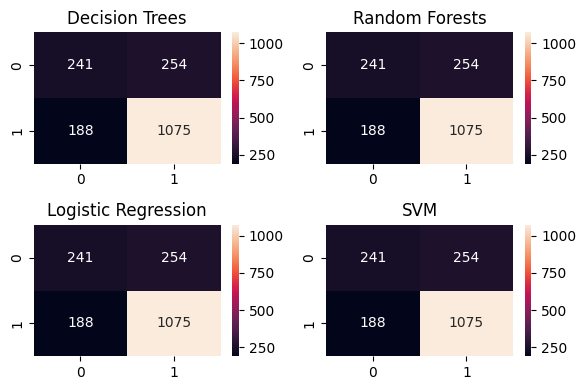

In [ ]:
plt.figure(figsize=(6,4))

models={'Decision Trees':DecisionTreeClassifier(random_state=42),
        'Random Forests':RandomForestClassifier(random_state=42),
        'Logistic Regression':LogisticRegression(random_state=42),
        'SVM':SVC(random_state=42)}

for i,(model_name, model) in enumerate (models.items(),1):
    # model training
    model.fit(X_train, y_train)


    # Model predictions
    ypred=model.predict(X_test)

    # model Evaluation
    report=classification_report(y_test,ly_pred)
#     accuracy = accuracy_score(y_test, y_pred)
#     report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, ly_pred)

    # Display results
    print(f'Classification reports for {model_name} are: \n{report}\n')

    plt.subplot(2,2,i)
    sns.heatmap(matrix,annot=True,fmt='')
    plt.title(f'{model_name}')
plt.tight_layout()
plt.show()

### Narration
Observed Low Performance which maybe due to the Imbalance dataset

Improving model performance by using SMOTE to make the dataset balanced

In [ ]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X, y)

In [ ]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.25)

In [ ]:
model_sm = LogisticRegression(random_state=42,max_iter=1000)
model_sm.fit(xr_train, yr_train)
y_pred_sm = model_sm.predict(xr_test)

In [ ]:
accuracy_lr = accuracy_score(yr_test, y_pred_sm)
conf_matrix_lr = confusion_matrix(yr_test, y_pred_sm)
classification_rep_lr = classification_report(yr_test, y_pred_sm)

Model performes better with SMOTE

In [ ]:
print(f"Accuracy: {accuracy_lr:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_lr)
print("\nClassification Report:")
print(classification_rep_lr)

Accuracy: 0.8514

Confusion Matrix:
[[654  70]
 [134 515]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       724
           1       0.88      0.79      0.83       649

    accuracy                           0.85      1373
   macro avg       0.86      0.85      0.85      1373
weighted avg       0.85      0.85      0.85      1373



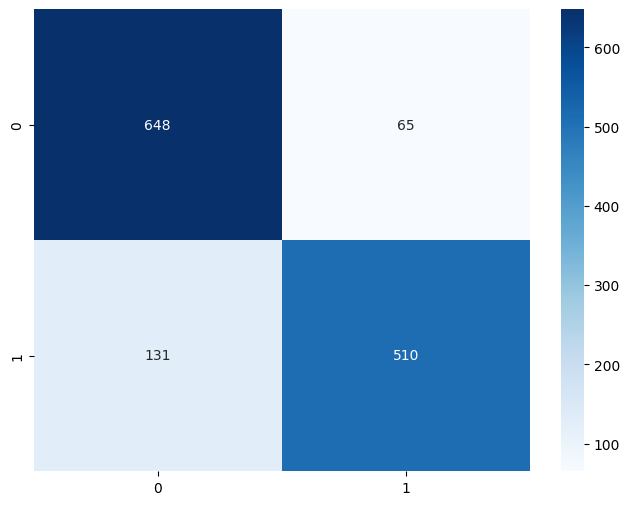

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, cmap='Blues', fmt='g')
plt.xlabel=('Predicted')
plt.ylabel=('Actual')
plt.title=('Confusion Matrix')
plt.show()

Experimenting with more models - SVC, RFC, GBC

In [ ]:
#deploying more algorithms

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

results = {}

for model_name, model in models.items():
    model.fit(xr_train, yr_train)
    yr_pred = model.predict(xr_test)
    accuracy = accuracy_score(yr_test, yr_pred)
    classification_rep = classification_report(yr_test, yr_pred)
    conf_matrix = confusion_matrix(yr_test, yr_pred)

    results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': classification_rep,
        'Confusion Matrix': conf_matrix}

In [ ]:
results['Logistic Regression'] = {
    'Accuracy': accuracy_lr,
    'Classification Report': classification_rep_lr,
    'Confusion Matrix': conf_matrix_lr
}

In [ ]:
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print("Classification Report:")
    print(result['Classification Report'])
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("\n" + "="*50 + "\n")




Model: SVM
Accuracy: 0.6162
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.87      0.71       724
           1       0.70      0.33      0.45       649

    accuracy                           0.62      1373
   macro avg       0.65      0.60      0.58      1373
weighted avg       0.64      0.62      0.58      1373

Confusion Matrix:
[[631  93]
 [434 215]]


Model: Random Forest
Accuracy: 0.9468
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       724
           1       0.95      0.94      0.94       649

    accuracy                           0.95      1373
   macro avg       0.95      0.95      0.95      1373
weighted avg       0.95      0.95      0.95      1373

Confusion Matrix:
[[692  32]
 [ 41 608]]


Model: Gradient Boosting
Accuracy: 0.9403
Classification Report:
              precision    recall  f1-score   support

           0       0.94     

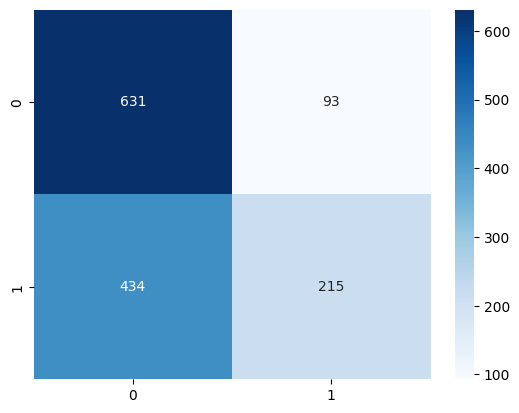

In [ ]:
conf_matrix_svm = [[631, 93],[434,215]]

# Plotting confusion matrix

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='g')
plt.xlabel=('Predicted')
plt.ylabel=('Actual')
plt.title=('Confusion Matrix (SVM)')
plt.show()

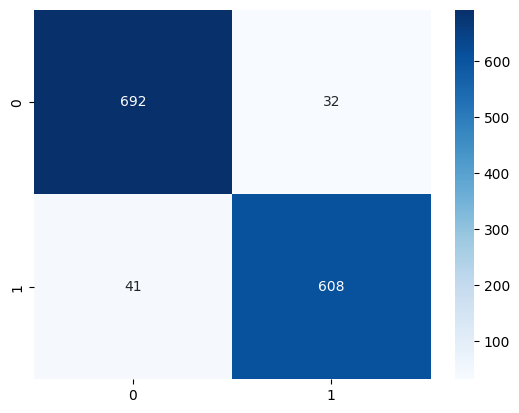

In [ ]:
conf_matrix_rf= [[692,32],
 [ 41,608]]

# Plotting confusion matrix

sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g',)
plt.xlabel=('Predicted')
plt.ylabel=('Actual')
plt.title=('Confusion Matrix (RF)')

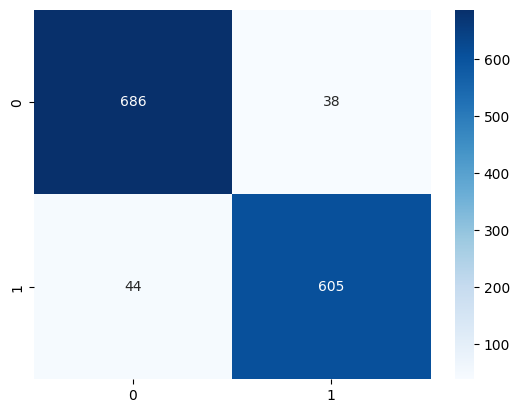

In [ ]:
conf_matrix_gb = [[686,38],
 [ 44,605]]

# Plotting confusion matrix

sns.heatmap(conf_matrix_gb, annot=True, cmap='Blues', fmt='g')
plt.xlabel=('Predicted')
plt.ylabel=('Actual')
plt.title=('Confusion Matrix (GB)')
plt.show()

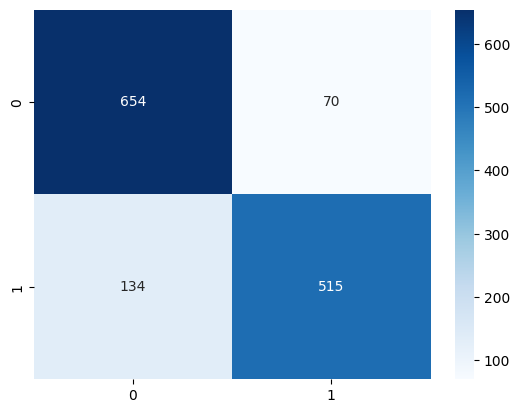

In [ ]:
conf_matrix_lr =[[654,70],
 [134,515]]

# Plotting confusion matrix
sns.heatmap(conf_matrix_lr, annot=True, cmap='Blues', fmt='g')
plt.xlabel=('Predicted')
plt.ylabel=('Actual')
plt.title=('Confusion Matrix (LR)')
plt.show()

Visualising the Accuracy of the Models

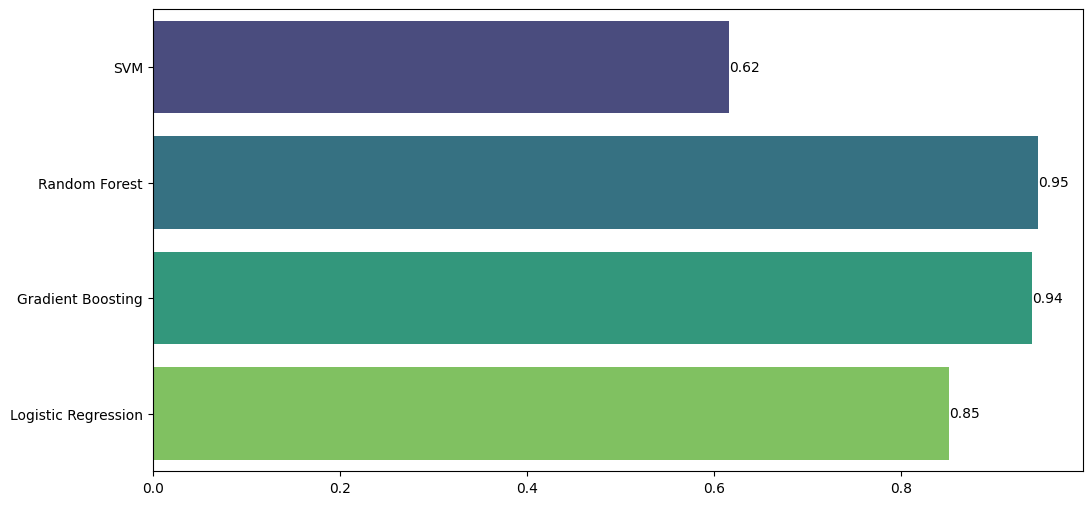

In [ ]:
# Extract model names and accuracy values from results dictionary
model_names = list(results.keys())
accuracy_values = [result['Accuracy'] for result in results.values()]

# Create horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=accuracy_values, y=model_names, palette='viridis')

# Add values on the bar plots
for i, v in enumerate(accuracy_values):
    plt.text(v, i, f'{v:.2f}', ha='left', va='center', color='black')

# Set plot title and labels
plt.title=('Model Comparison - Accuracy')
plt.xlabel=('Accuracy')
plt.ylabel=('Model')

# Show plot
plt.show()

### Hyperparameter Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,r2_score
from sklearn.ensemble import GradientBoostingClassifier

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits


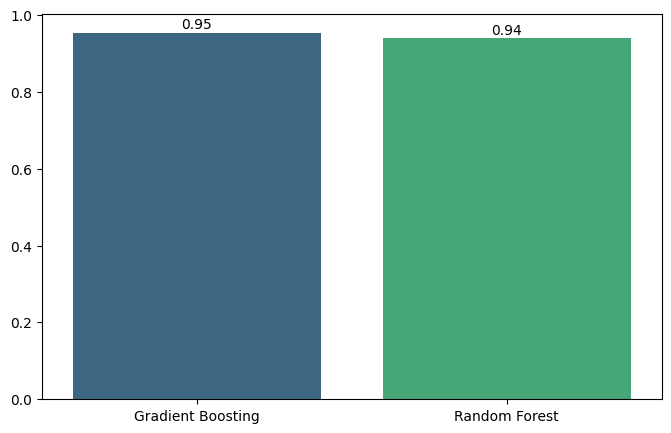

Confusion Matrix (Gradient Boosting):
 [[694  30]
 [ 33 616]]

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       724
           1       0.95      0.95      0.95       649

    accuracy                           0.95      1373
   macro avg       0.95      0.95      0.95      1373
weighted avg       0.95      0.95      0.95      1373

Confusion Matrix (Random Forest):
 [[687  37]
 [ 45 604]]

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       724
           1       0.94      0.93      0.94       649

    accuracy                           0.94      1373
   macro avg       0.94      0.94      0.94      1373
weighted avg       0.94      0.94      0.94      1373



In [ ]:
# Hyperparameter tuning for Gradient Boosting Classifier
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb_model = GradientBoostingClassifier()
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, verbose=1)
grid_search_gb.fit(xr_train, yr_train)
best_model_gb = grid_search_gb.best_estimator_
y_pred_test_gb = best_model_gb.predict(xr_test)
accuracy_test_gb = accuracy_score(yr_test, y_pred_test_gb)

# Hyperparameter tuning for Random Forest Classifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, verbose=1)
grid_search_rf.fit(xr_train, yr_train)
best_model_rf = grid_search_rf.best_estimator_
y_pred_test_rf = best_model_rf.predict(xr_test)
accuracy_test_rf = accuracy_score(yr_test, y_pred_test_rf)

# Plotting results
models = ['Gradient Boosting', 'Random Forest']
accuracies = [accuracy_test_gb, accuracy_test_rf]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
#plt.ylim(0.8, 1.0)
plt.title=('Model Comparison - Accuracy')
plt.ylabel=('Accuracy')
plt.xlabel=('Model')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', color='black')
plt.show()

# Print confusion matrix and classification report for Gradient Boosting
print("Confusion Matrix (Gradient Boosting):\n", confusion_matrix(yr_test, y_pred_test_gb))
print("\nClassification Report (Gradient Boosting):\n", classification_report(yr_test, y_pred_test_gb))

# Print confusion matrix and classification report for Random Forest
print("Confusion Matrix (Random Forest):\n", confusion_matrix(yr_test, y_pred_test_rf))
print("\nClassification Report (Random Forest):\n", classification_report(yr_test, y_pred_test_rf))

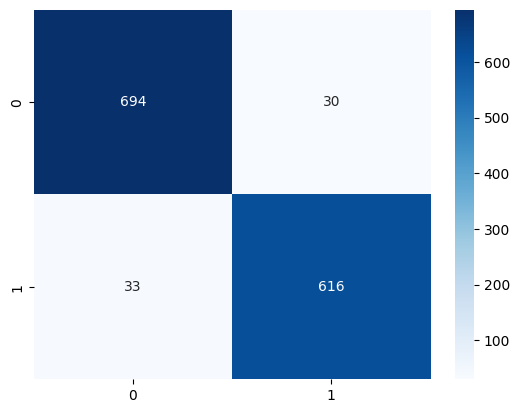

In [ ]:
conf_matrix_GB = [[694,30],
 [33,616]]
# Plotting confusion matrix

sns.heatmap(conf_matrix_GB, annot=True, cmap='Blues', fmt='g')
plt.xlabel=('Predicted')
plt.ylabel=('Actual')
plt.title=('Confusion Matrix (SVM)')
plt.show()

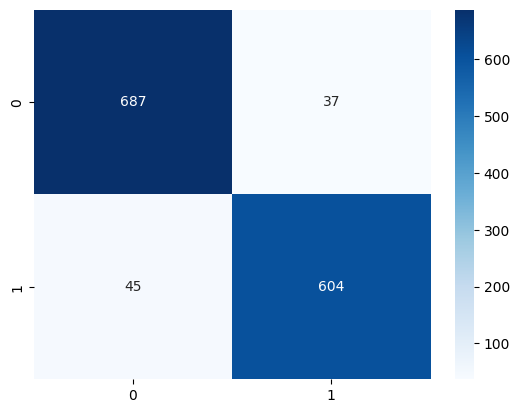

In [ ]:
conf_matrix_RF = [[687,37],
 [45,604]]
# Plotting confusion matrix

sns.heatmap(conf_matrix_RF, annot=True, cmap='Blues', fmt='g')
plt.xlabel=('Predicted')
plt.ylabel=('Actual')
plt.title=('Confusion Matrix (SVM)')
plt.show()